# Analyzing NYTbd Sample 3
<br>
This notebook is looking at the NYTbd Sample 3 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    
# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

## Read in NYTbd Sample 3 Data- ACCENT and PETRARCH2

In [6]:
accent3 = pd.read_stata("/Volumes/Cline/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Accent_NYTbd_sample3.dta")
petrarch3 = pd.read_stata("/Volumes/Cline/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Petrarch_NYTbd_sample3.dta")

In [7]:
# parse accent3 
%time accent3['parsed'] = core_parser(accent3, 'text')
accent3['dep'] = dep_parser(accent3, 'text')

CPU times: user 520 ms, sys: 43.3 ms, total: 563 ms
Wall time: 2min 23s


In [8]:
# parse petrarch3 
%time petrarch3['parsed'] = core_parser(petrarch3, 'text')
petrarch3['dep'] = dep_parser(petrarch3, 'text')

CPU times: user 90.3 ms, sys: 7.72 ms, total: 98 ms
Wall time: 5.03 s


## Subset Data by Event Coder

In [9]:
keys = list(['aid', 'code'])
accent3_index = accent3.set_index(keys).index
petrarch3_index = petrarch3.set_index(keys).index

# Produce df's of mutually exclusive events 
accent3_only = accent3[~accent3_index.isin(petrarch3_index)]
petrarch3_only = petrarch3[~petrarch3_index.isin(accent3_index)]

# Produce df's of same article, same coding
accent3_same_code = accent3[accent3_index.isin(petrarch3_index)]
petrarch3_same_code = petrarch3[petrarch3_index.isin(accent3_index)]

# sort values on AID and reset index 
accent3_only = accent3_only.sort_values('aid').reset_index(drop = True)
petrarch3_only = petrarch3_only.sort_values('aid').reset_index(drop = True)

accent3_same_code = accent3_same_code.sort_values('aid').reset_index(drop = True)
petrarch3_same_code = petrarch3_same_code.sort_values('aid').reset_index(drop = True)

## Look for errors in ACCENT and PETRARCH
<br>
Event codes: 140, 141, 143, 145, 1723, 181, 183, 1831, 186

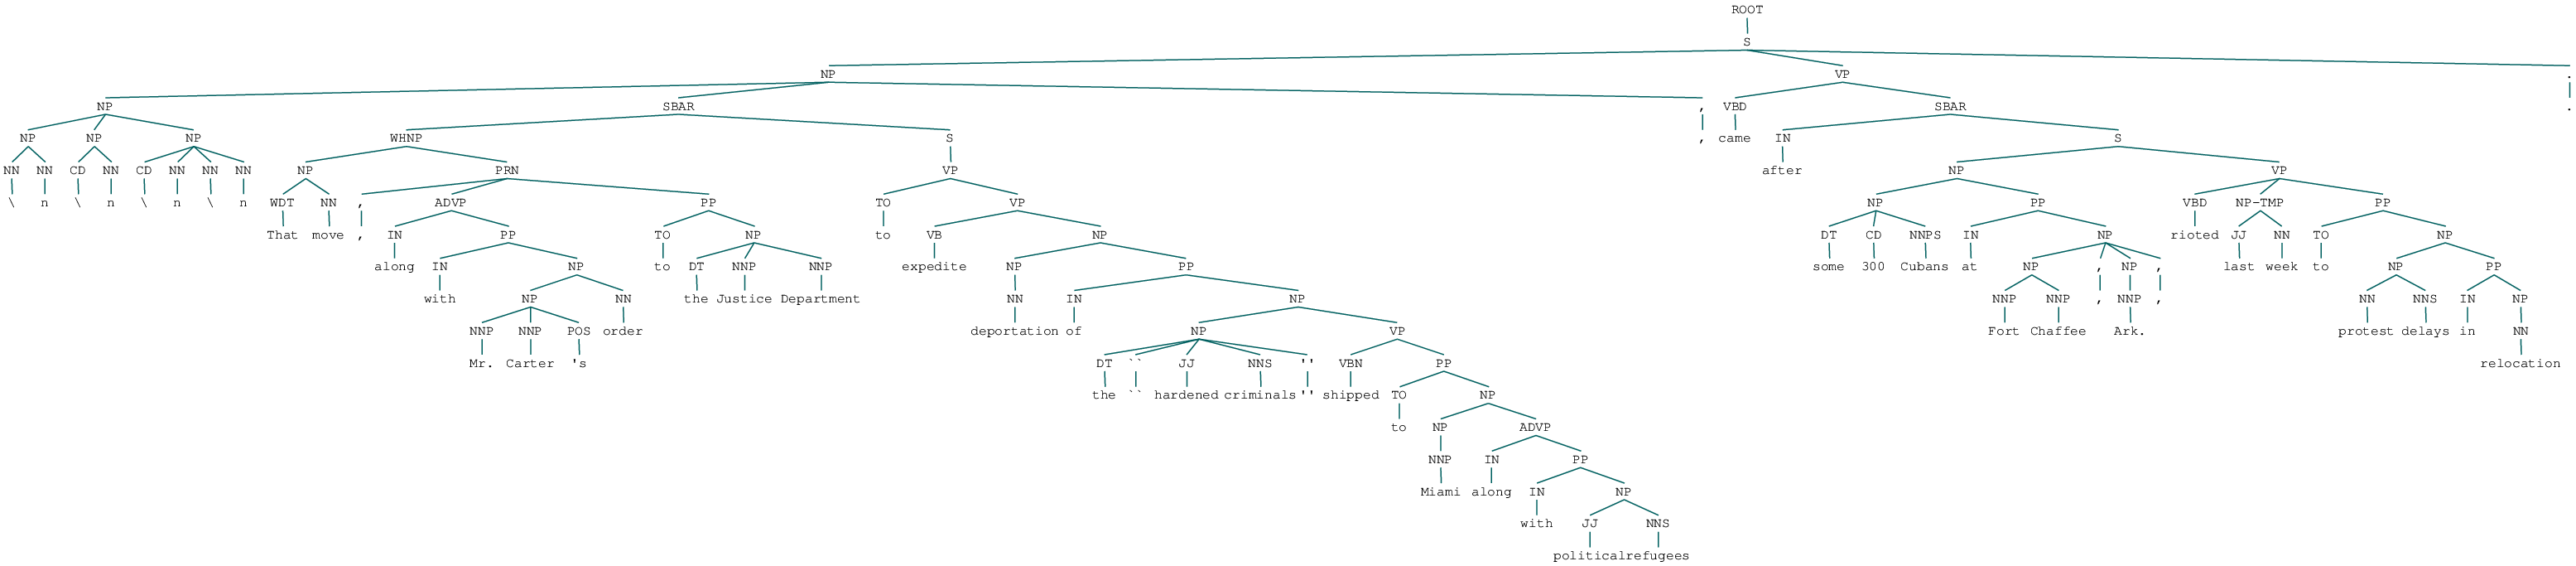

"Text = \\n\\n\\n\\n     That move, along with Mr. Carter's order to the Justice Department to expedite deportation of the ''hardened criminals'' shipped to Miami along with political refugees, came after some 300 Cubans at Fort Chaffee, Ark., rioted last week to protest delays in relocation."

'Code = 145'

'AID = 22343573'

0

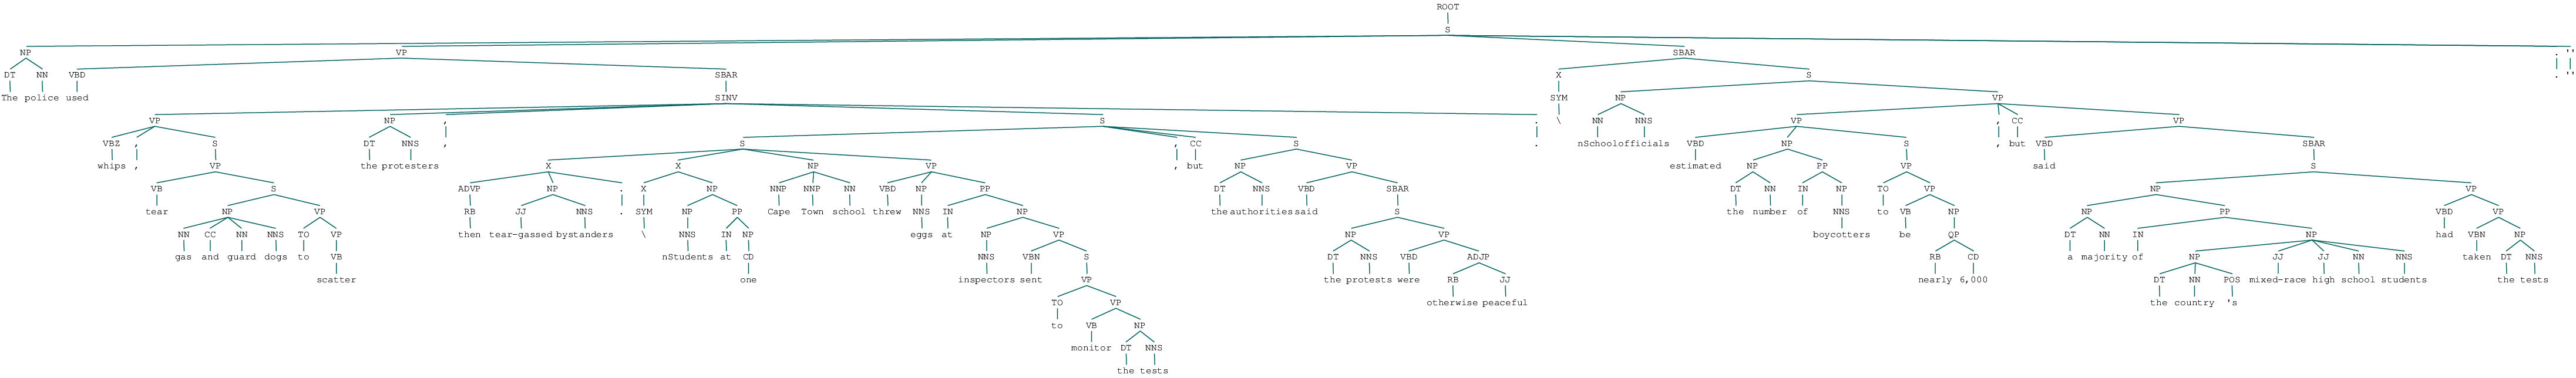

'Text = The police used whips, tear gas and guard dogs to scatter the protesters, then tear-gassed bystanders.\\nStudents at one Cape Town school threw eggs at inspectors sent to monitor the tests, but the authorities said the protests were otherwise peaceful.\\nSchool officials estimated the number of boycotters to be nearly 6,000, but said a majority of the country\'s mixed-race high school students had taken the tests."'

'Code = 145'

'AID = 22420969'

1

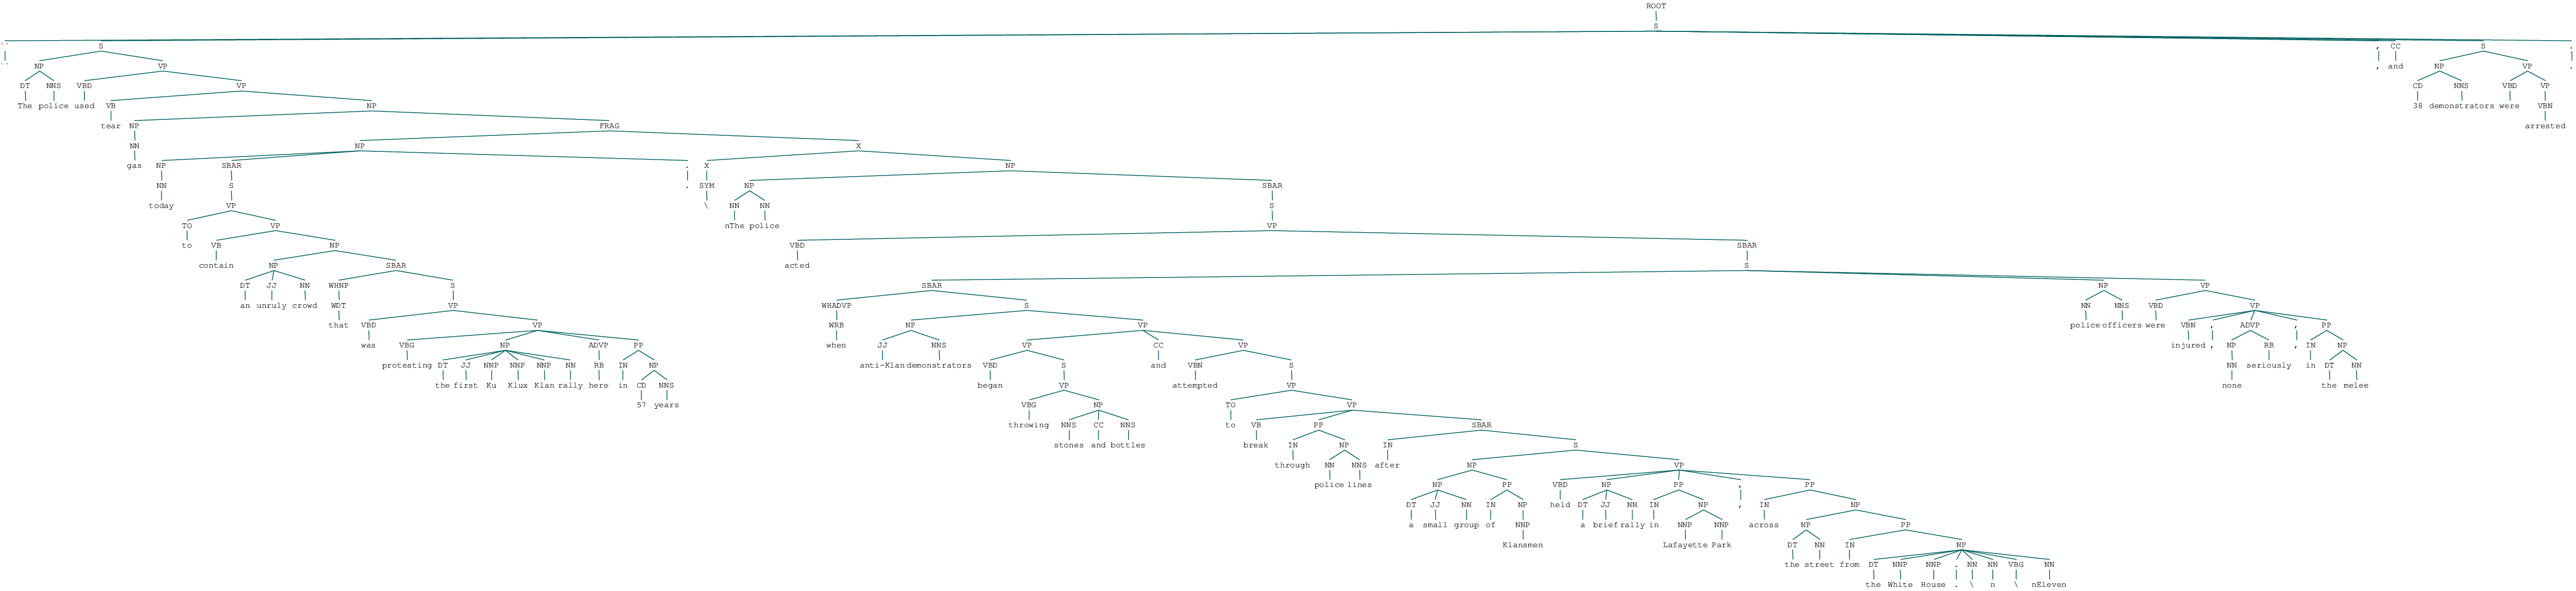

'Text = "The police used tear gas today to contain an unruly crowd that was protesting the first Ku Klux Klan rally here in 57 years.\\nThe police acted when anti-Klan demonstrators began throwing stones and bottles and attempted to break through police lines after a small group of Klansmen held a brief rally in Lafayette Park, across the street from the White House.\\n\\nEleven police officers were injured, none seriously, in the melee, and 38 demonstrators were arrested.'

'Code = 145'

'AID = 22474093'

2

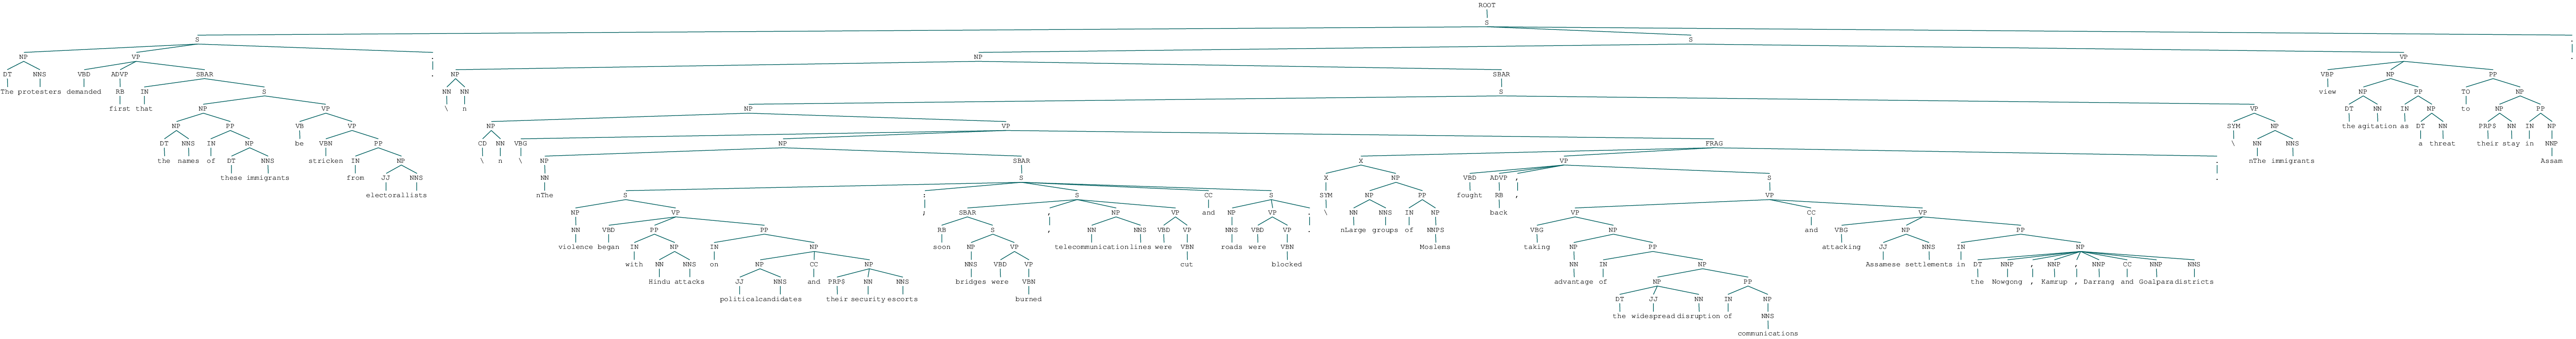

'Text = The protesters demanded first that the names of these immigrants be stricken from electoral lists.\\n\\n\\nThe violence began with Hindu attacks on political candidates and their security escorts; soon bridges were burned, telecommunication lines were cut and roads were blocked.\\nLarge groups of Moslems fought back, taking advantage of the widespread disruption of communications and attacking Assamese settlements in the Nowgong, Kamrup, Darrang and Goalpara districts.\\nThe immigrants view the agitation as a threat to their stay in Assam.'

'Code = 145'

'AID = 22524105'

3

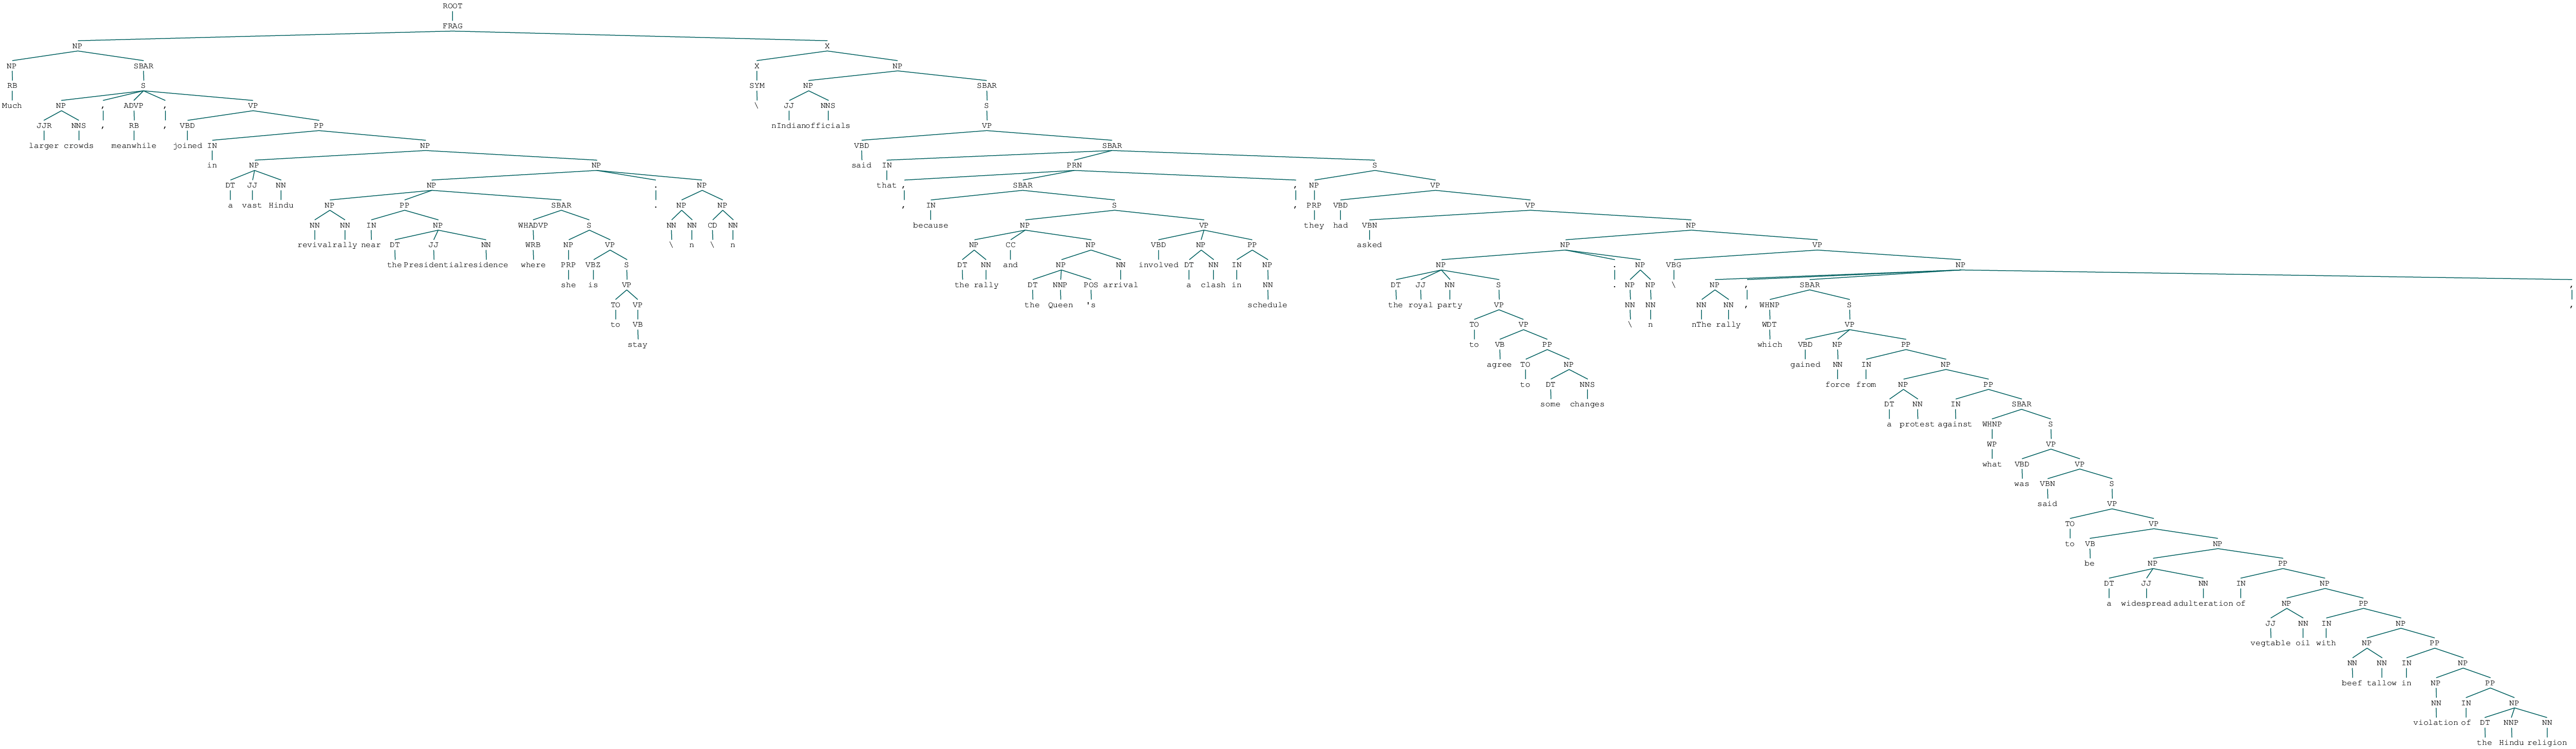

"Text = Much larger crowds, meanwhile, joined in a vast Hindu revival rally near the Presidential residence where she is to stay.\\n\\n\\nIndian officials said that, because the rally and the Queen's arrival involved a clash in schedule, they had asked the royal party to agree to some changes.\\n\\nThe rally, which gained force from a protest against what was said to be a widespread adulteration of vegtable oil with beef tallow in violation of the Hindu religion,"

'Code = 145'

'AID = 22540430'

4

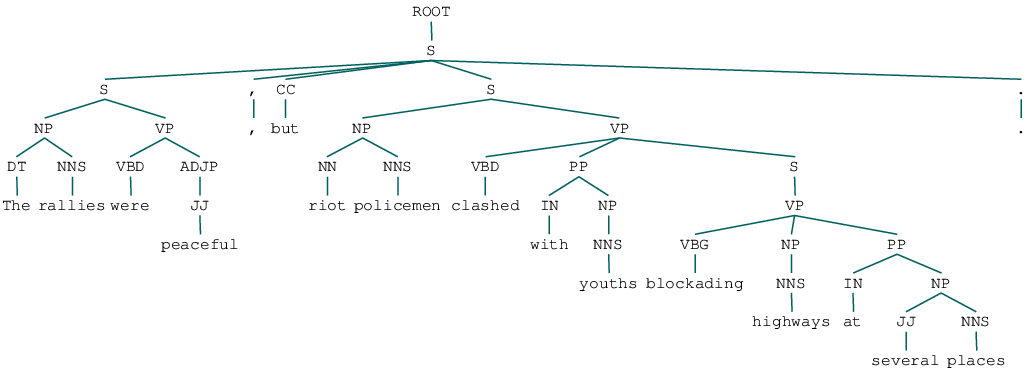

'Text = The rallies were peaceful, but riot policemen clashed with youths blockading highways at several places.'

'Code = 145'

'AID = 22609103'

5

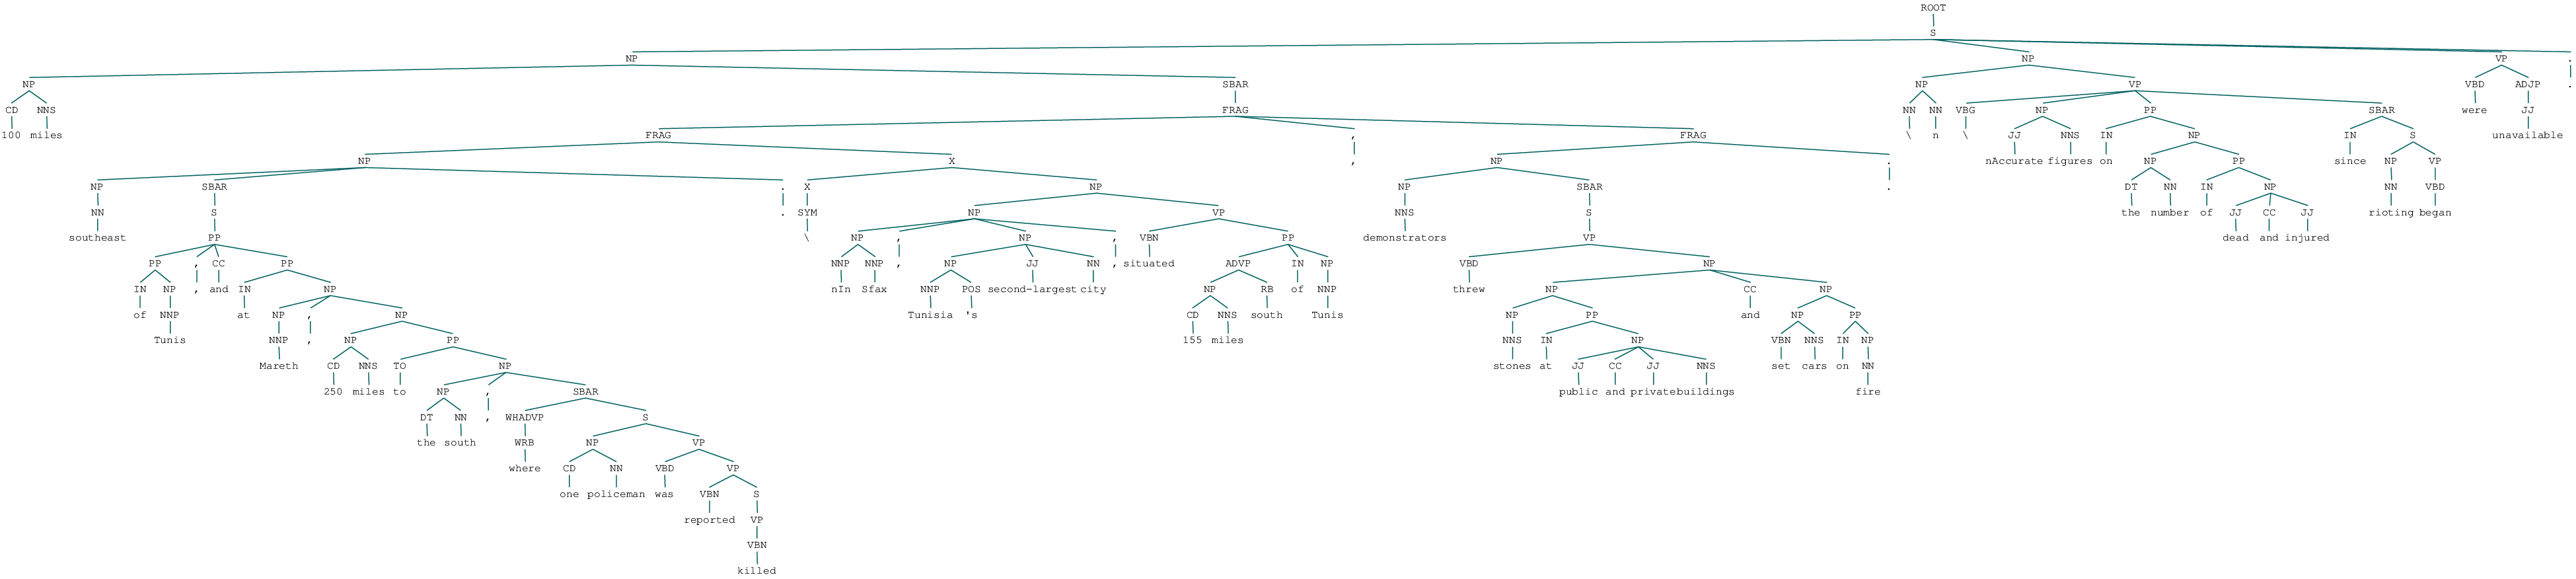

"Text =  100 miles southeast of Tunis, and at Mareth, 250 miles to the south, where one policeman was reported killed.\\nIn Sfax, Tunisia's second-largest city, situated 155 miles south of Tunis, demonstrators threw stones at public and private buildings and set cars on fire.\\n\\nAccurate figures on the number of dead and injured since rioting began were unavailable."

'Code = 145'

'AID = 22621011'

6

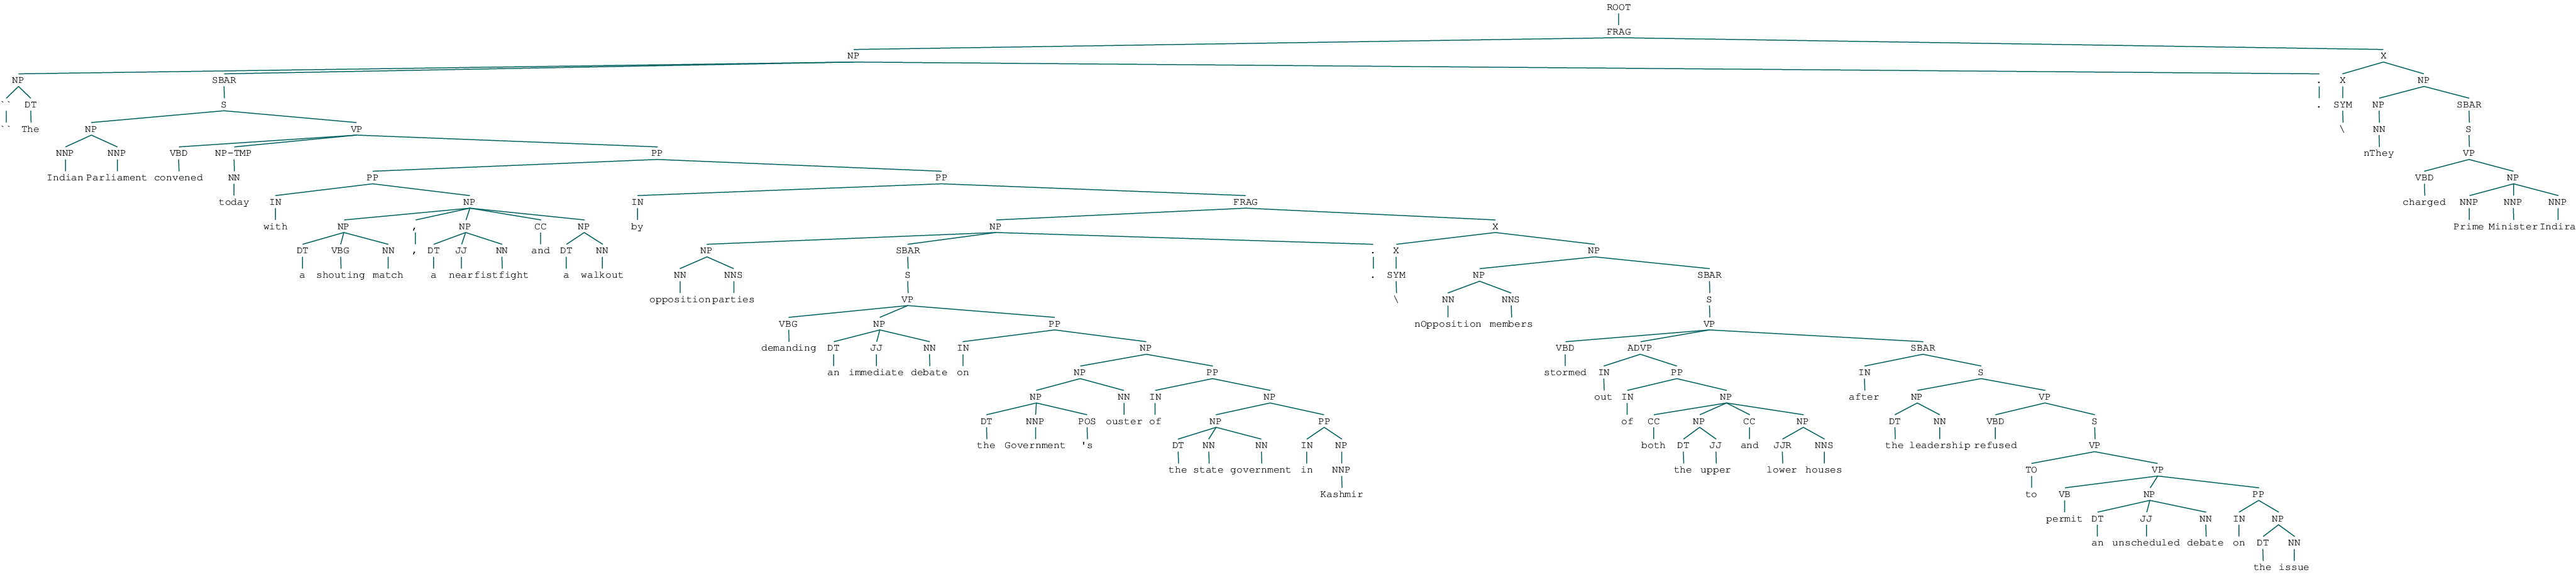

'Text = "The Indian Parliament convened today with a shouting match, a near fistfight and a walkout by opposition parties demanding an immediate debate on the Government\'s ouster of the state government in Kashmir.\\nOpposition members stormed out of both the upper and lower houses after the leadership refused to permit an unscheduled debate on the issue.\\nThey charged Prime Minister Indira '

'Code = 145'

'AID = 22646632'

7

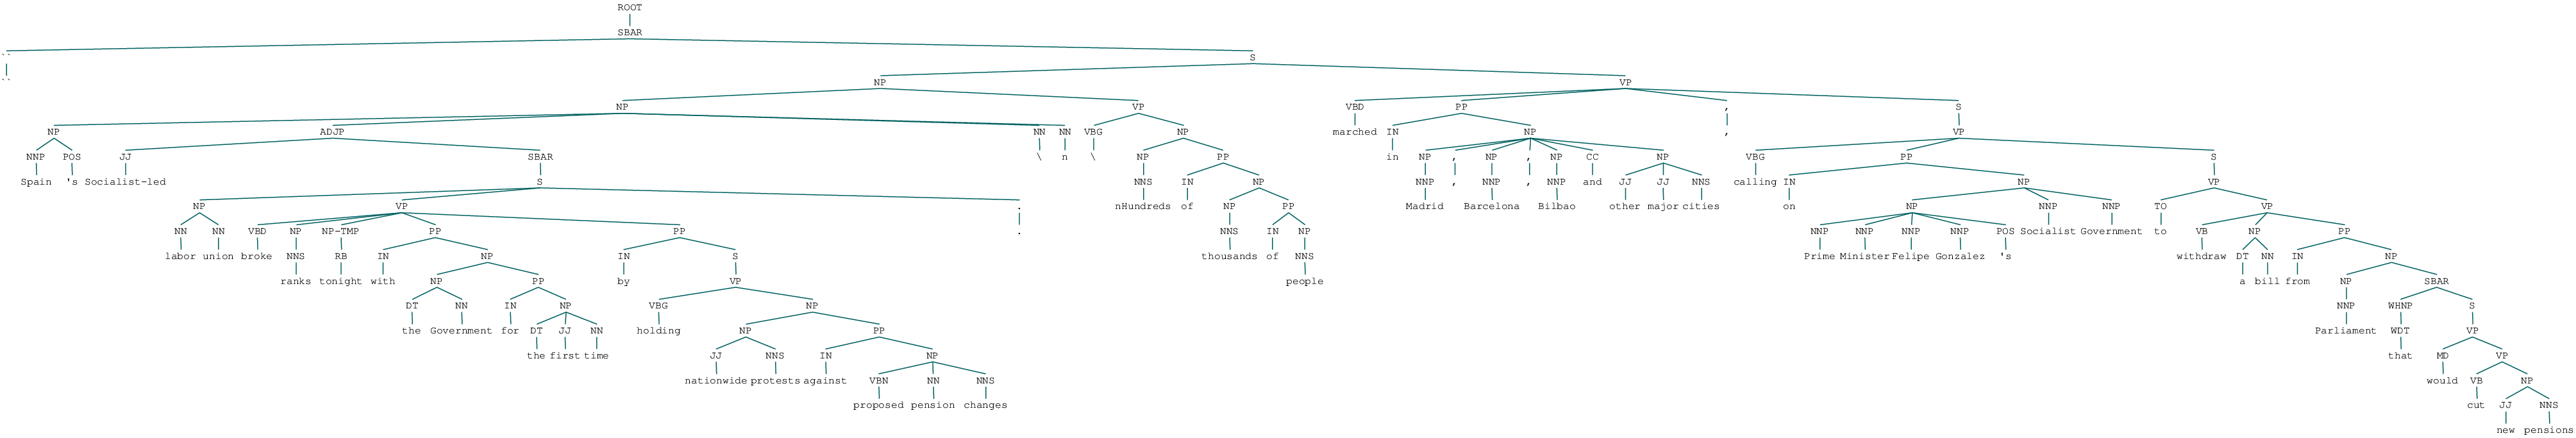

'Text = "Spain\'s Socialist-led labor union broke ranks tonight with the Government for the first time by holding nationwide protests against proposed pension changes.\\n\\nHundreds of thousands of people marched in Madrid, Barcelona, Bilbao and other major cities, calling on Prime Minister Felipe Gonzalez\'s Socialist Government to withdraw a bill from Parliament that would cut new pensions '

'Code = 145'

'AID = 22729208'

8

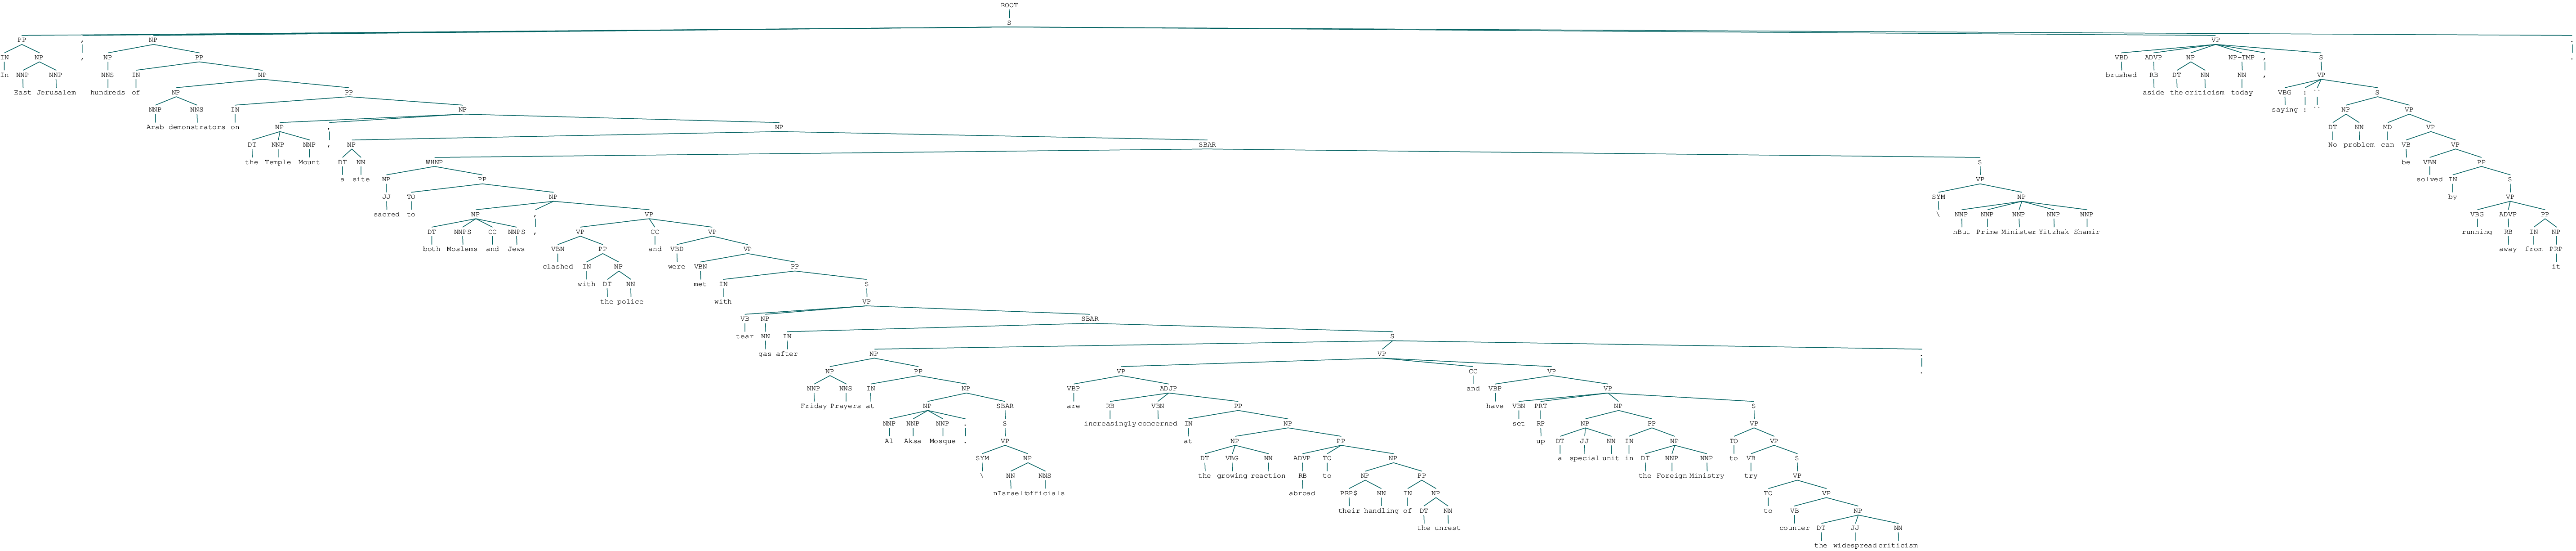

"Text = In East Jerusalem, hundreds of Arab demonstrators on the Temple Mount, a site sacred to both Moslems and Jews, clashed with the police and were met with tear gas after Friday Prayers at Al Aksa Mosque.\\nIsraeli officials are increasingly concerned at the growing reaction abroad to their handling of the unrest and have set up a special unit in the Foreign Ministry to try to counter the widespread criticism.\\nBut Prime Minister Yitzhak Shamir brushed aside the criticism today, saying: ''No problem can be solved by running away from it."

'Code = 145'

'AID = 22828852'

9

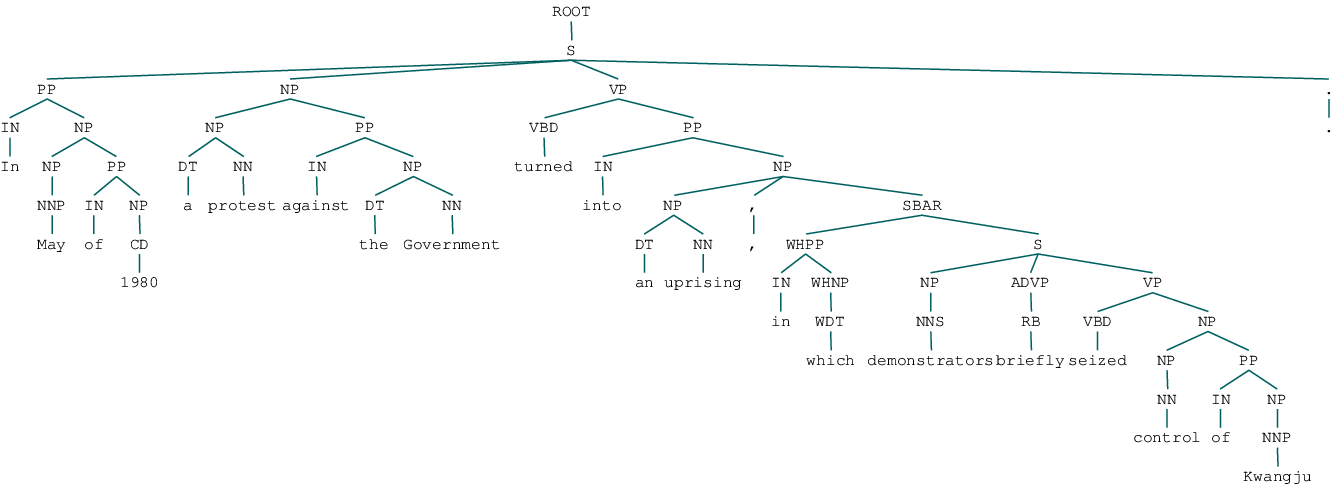

'Text = In May of 1980 a protest against the Government turned into an uprising, in which demonstrators briefly seized control of Kwangju.'

'Code = 145'

'AID = 22853018'

10

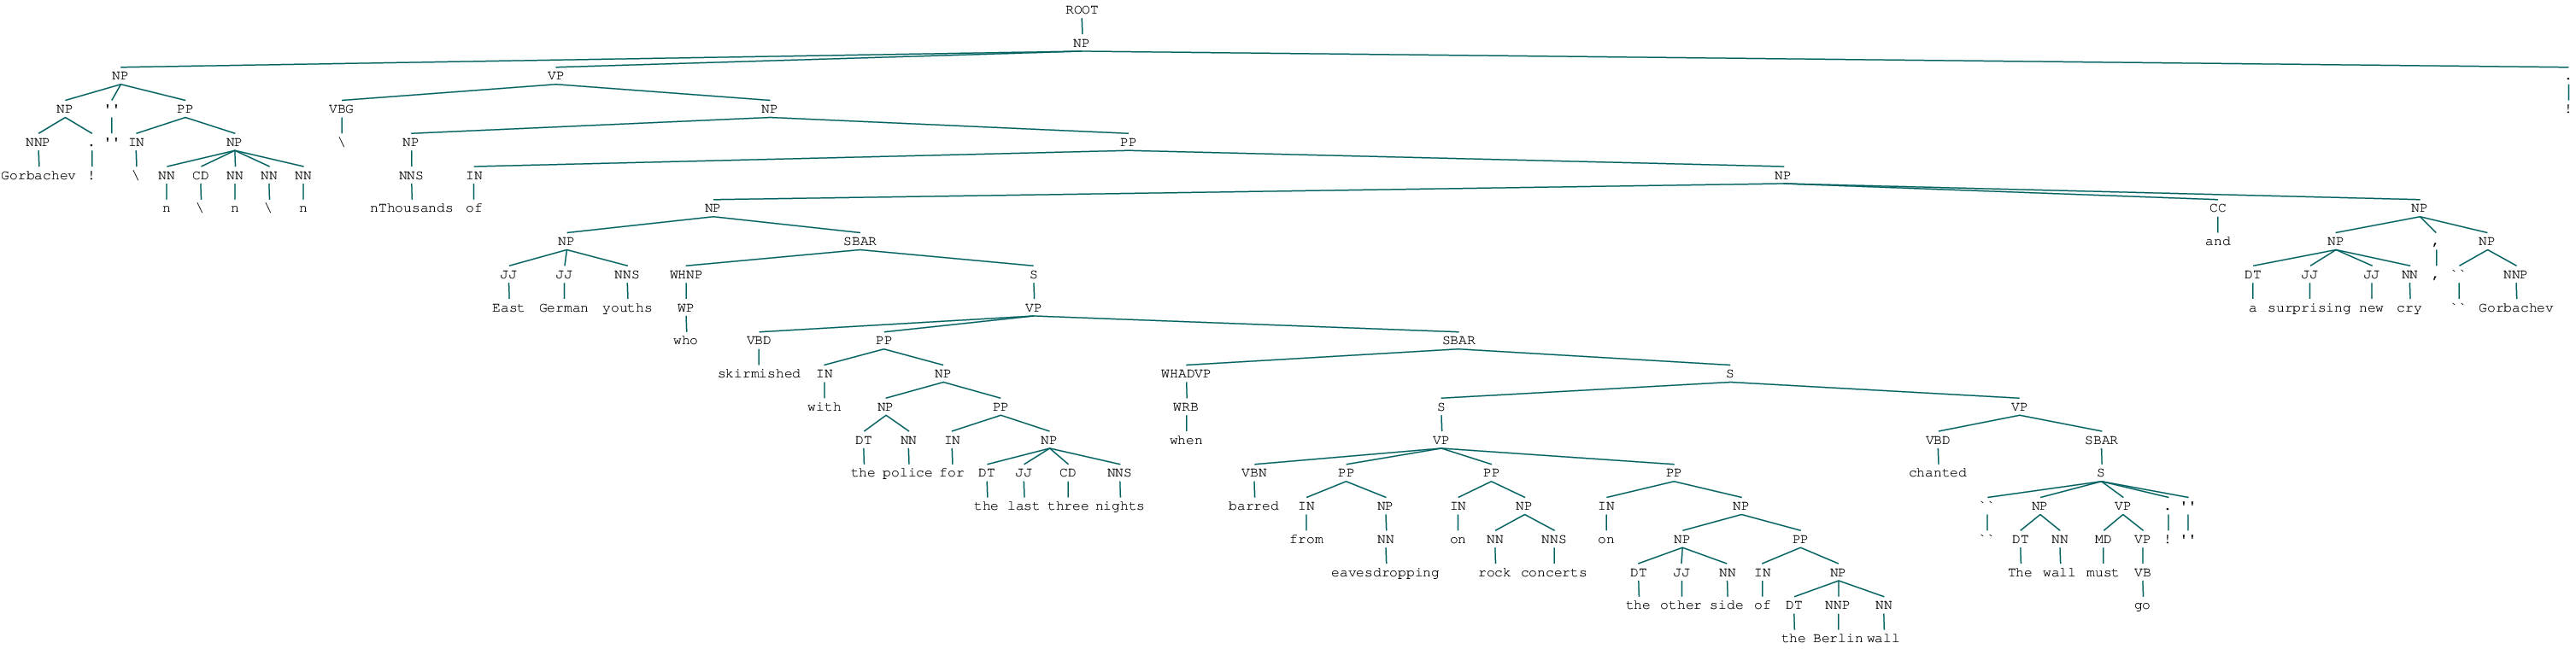

"Text = Gorbachev!''\\n\\n\\n\\nThousands of East German youths who skirmished with the police for the last three nights when barred from eavesdropping on rock concerts on the other side of the Berlin wall chanted ''The wall must go!'' and a surprising new cry, ''Gorbachev!"

'Code = 145'

'AID = 22854736'

11

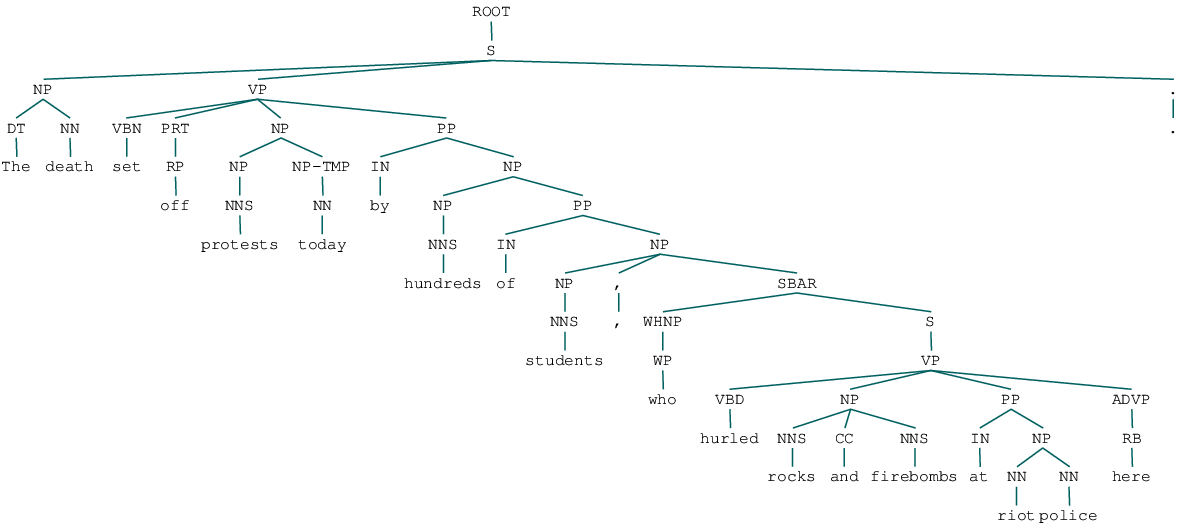

'Text = The death set off protests today by hundreds of students, who hurled rocks and firebombs at riot police here.'

'Code = 145'

'AID = 22923131'

12

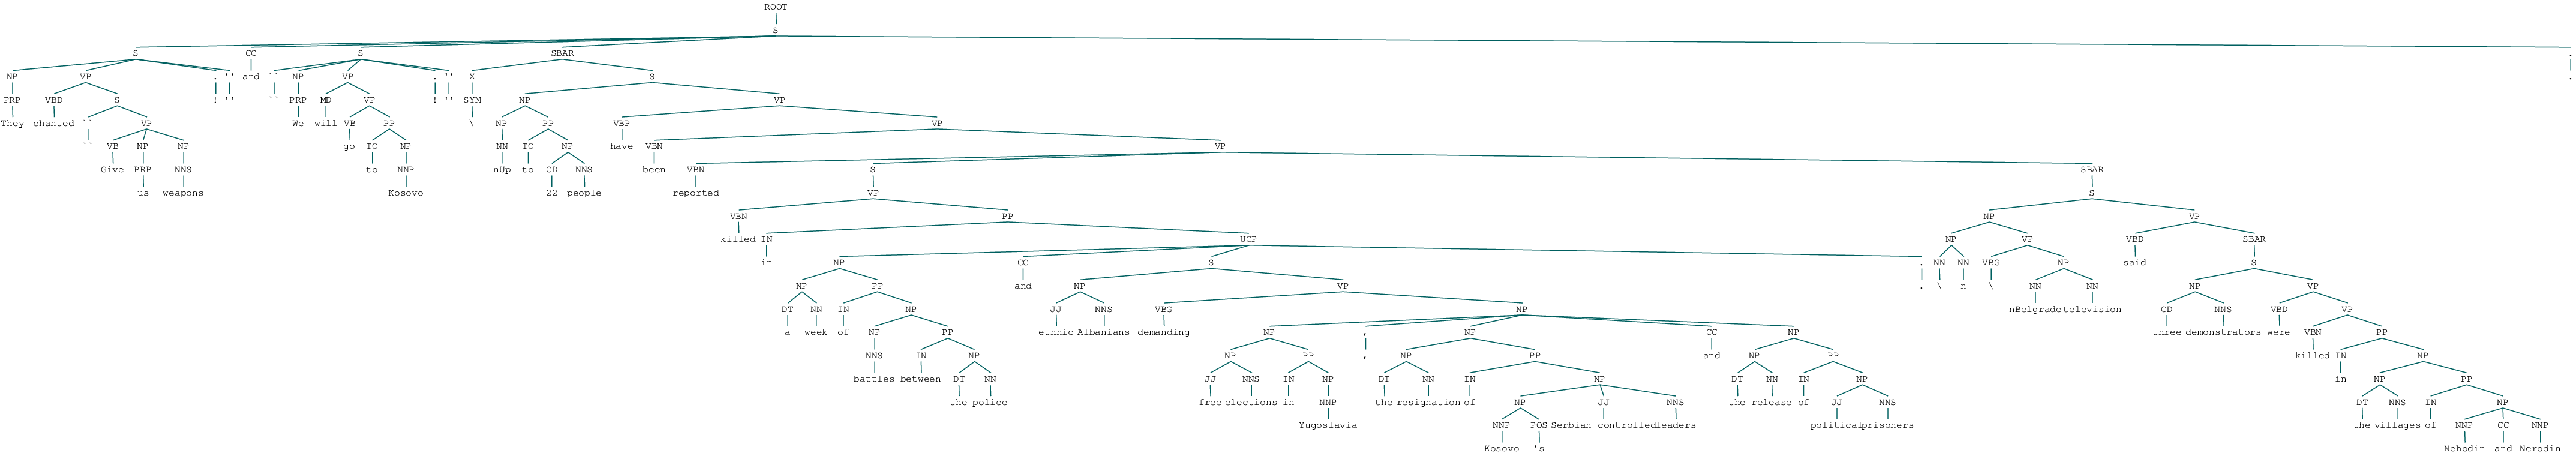

"Text = They chanted ''Give us weapons!'' and ''We will go to Kosovo!''\\nUp to 22 people have been reported killed in a week of battles between the police and ethnic Albanians demanding free elections in Yugoslavia, the resignation of Kosovo's Serbian-controlled leaders and the release of political prisoners.\\n\\nBelgrade television said three demonstrators were killed in the villages of Nehodin and Nerodin."

'Code = 145'

'AID = 23035004'

13

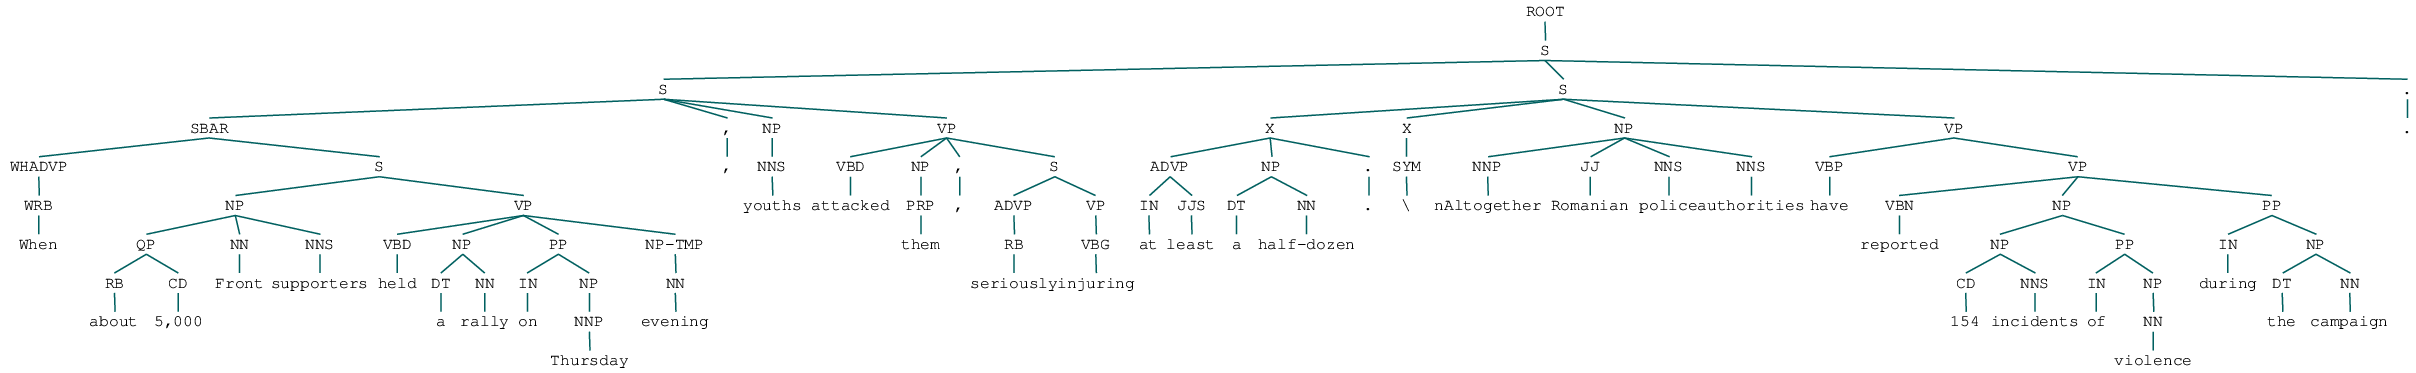

'Text = When about 5,000 Front supporters held a rally on Thursday evening, youths attacked them, seriously injuring at least a half-dozen.\\nAltogether Romanian police authorities have reported 154 incidents of violence during the campaign.'

'Code = 145'

'AID = 23090147'

14

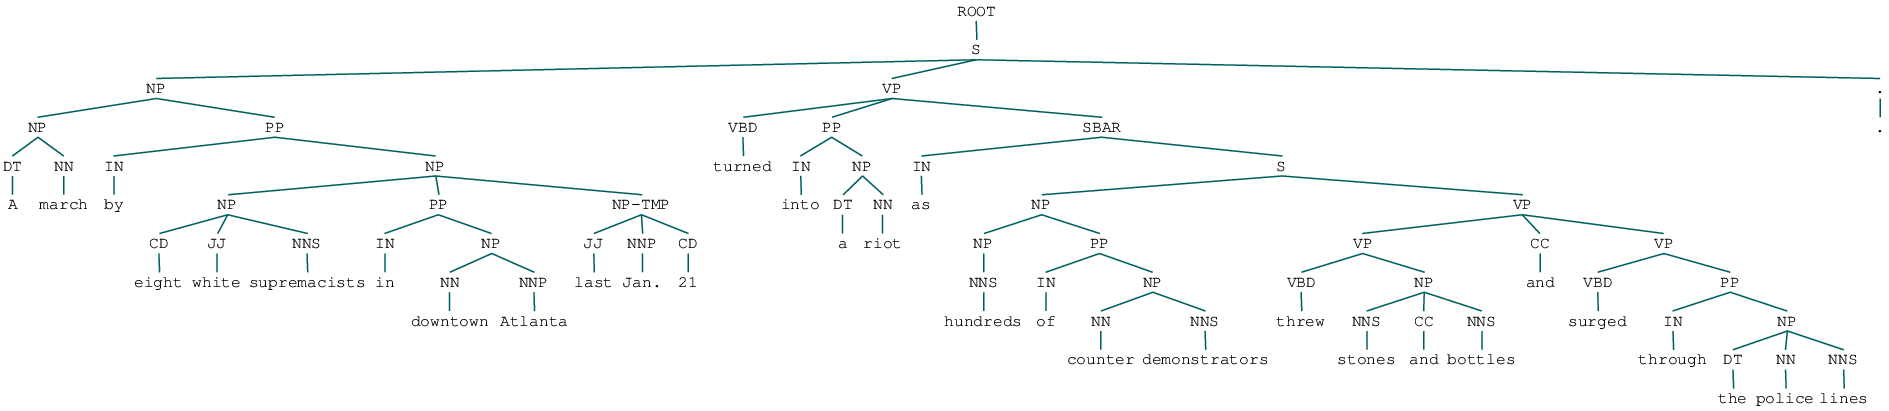

'Text = A march by eight white supremacists in downtown Atlanta last Jan. 21 turned into a riot as hundreds of counter demonstrators threw stones and bottles and surged through the police lines.'

'Code = 145'

'AID = 23094979'

15

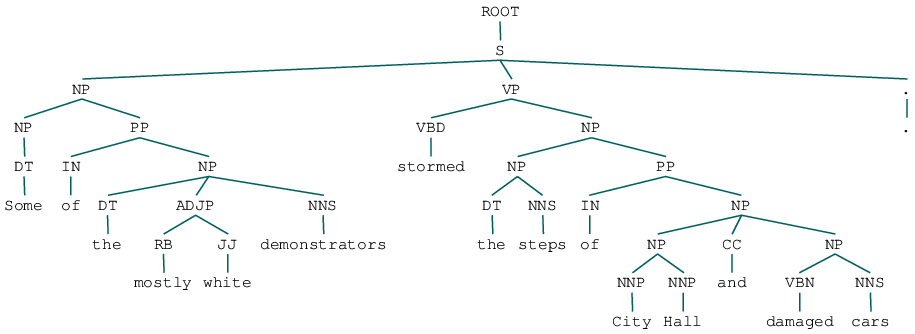

'Text = Some of the mostly white demonstrators stormed the steps of City Hall and damaged cars.'

'Code = 145'

'AID = 23299143'

16

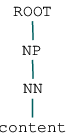

'Text = content\r"Just a few hours before the Olympic torch was lighted in Centennial Olympic Stadium, about 50 people gathered to set fire to the Georgia state flag.\\nProtesters led by the Rev. Hosea L. Williams marched from the grave site of Martin Luther King Jr. to the steps of the Capitol this evening and set fire to the flag, which is dominated by the stars and bars of the Confederacy.'

'Code = 145'

'AID = 23506913'

17

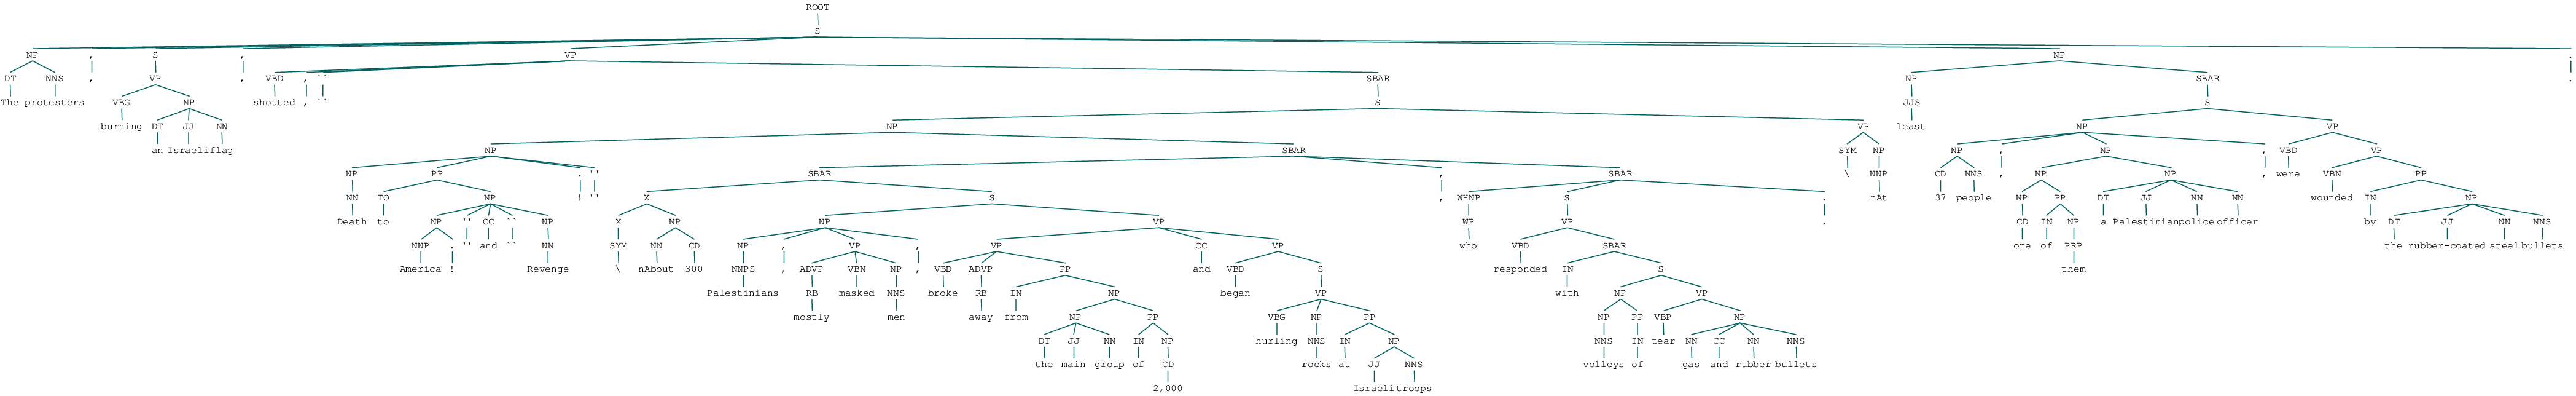

"Text = The protesters, burning an Israeli flag, shouted, ''Death to America!'' and ''Revenge!''\\nAbout 300 Palestinians, mostly masked men, broke away from the main group of 2,000 and began hurling rocks at Israeli troops, who responded with volleys of tear gas and rubber bullets.\\nAt least 37 people, one of them a Palestinian police officer, were wounded by the rubber-coated steel bullets."

'Code = 145'

'AID = 23556489'

18

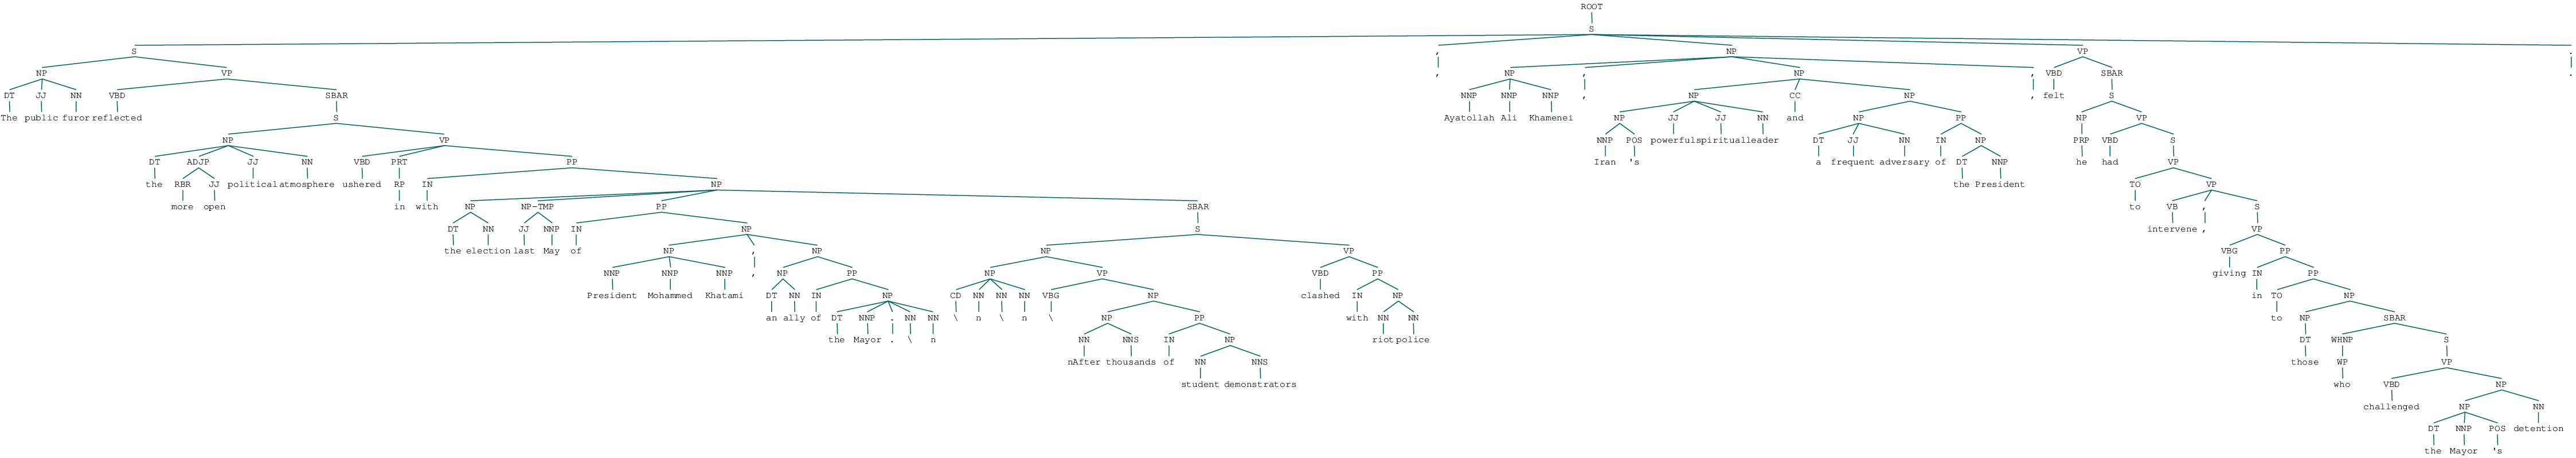

"Text = The public furor reflected the more open political atmosphere ushered in with the election last May of President Mohammed Khatami, an ally of the Mayor.\\n\\n\\n\\nAfter thousands of student demonstrators clashed with riot police, Ayatollah Ali Khamenei, Iran's powerful spiritual leader and a frequent adversary of the President, felt he had to intervene, giving in to those who challenged the Mayor's detention."

'Code = 145'

'AID = 23606355'

19

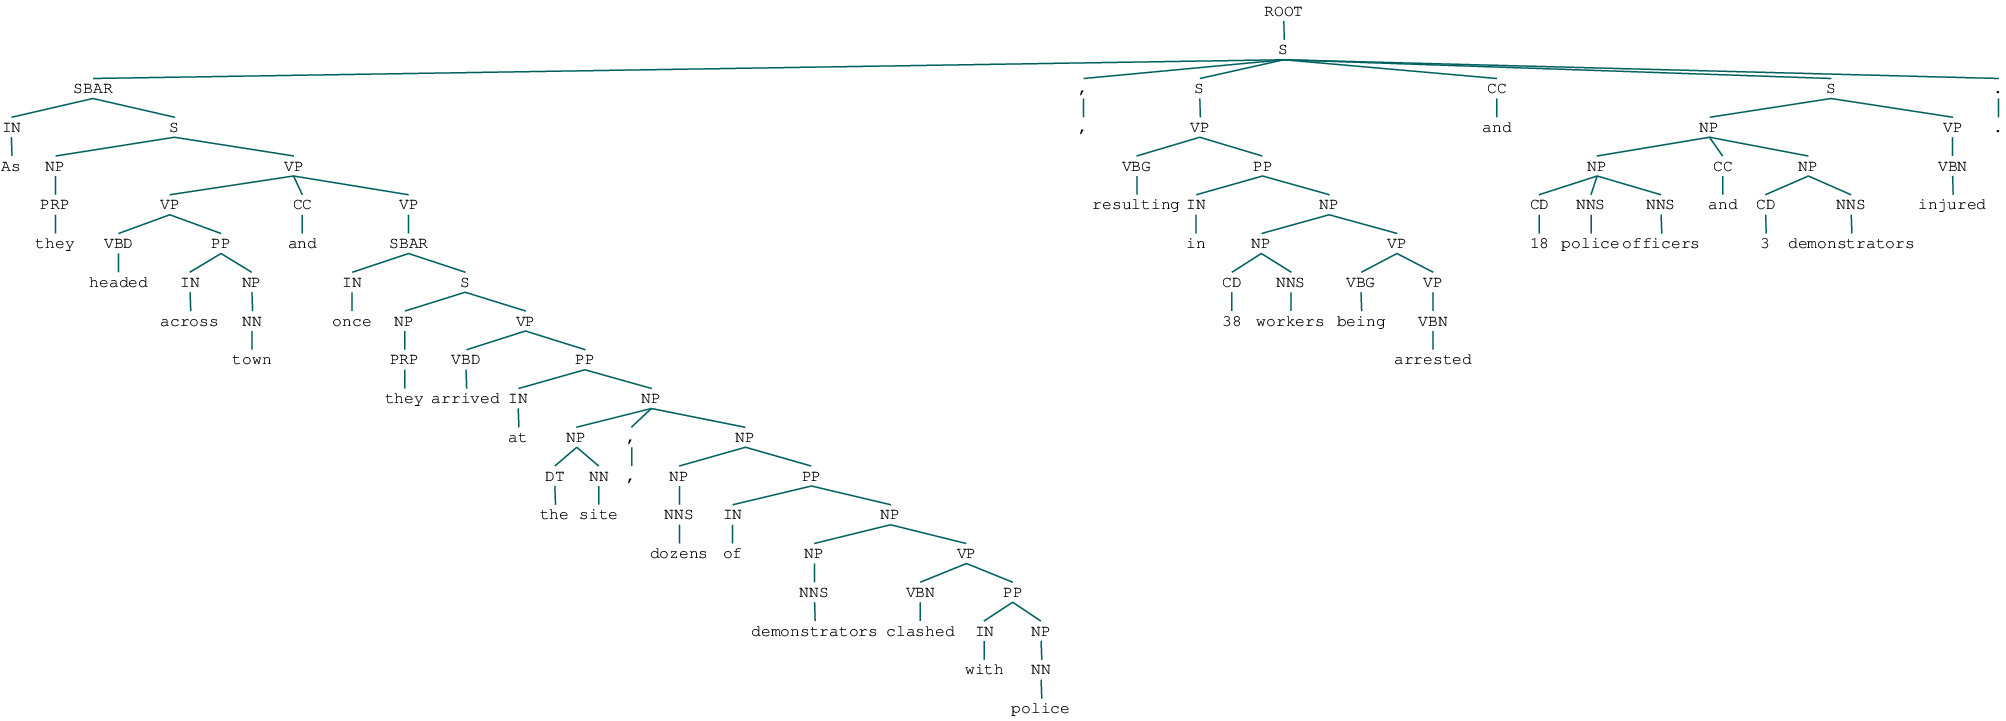

'Text = As they headed across town and once they arrived at the site, dozens of demonstrators clashed with police, resulting in 38 workers being arrested and 18 police officers and 3 demonstrators injured.'

'Code = 145'

'AID = 23612962'

20

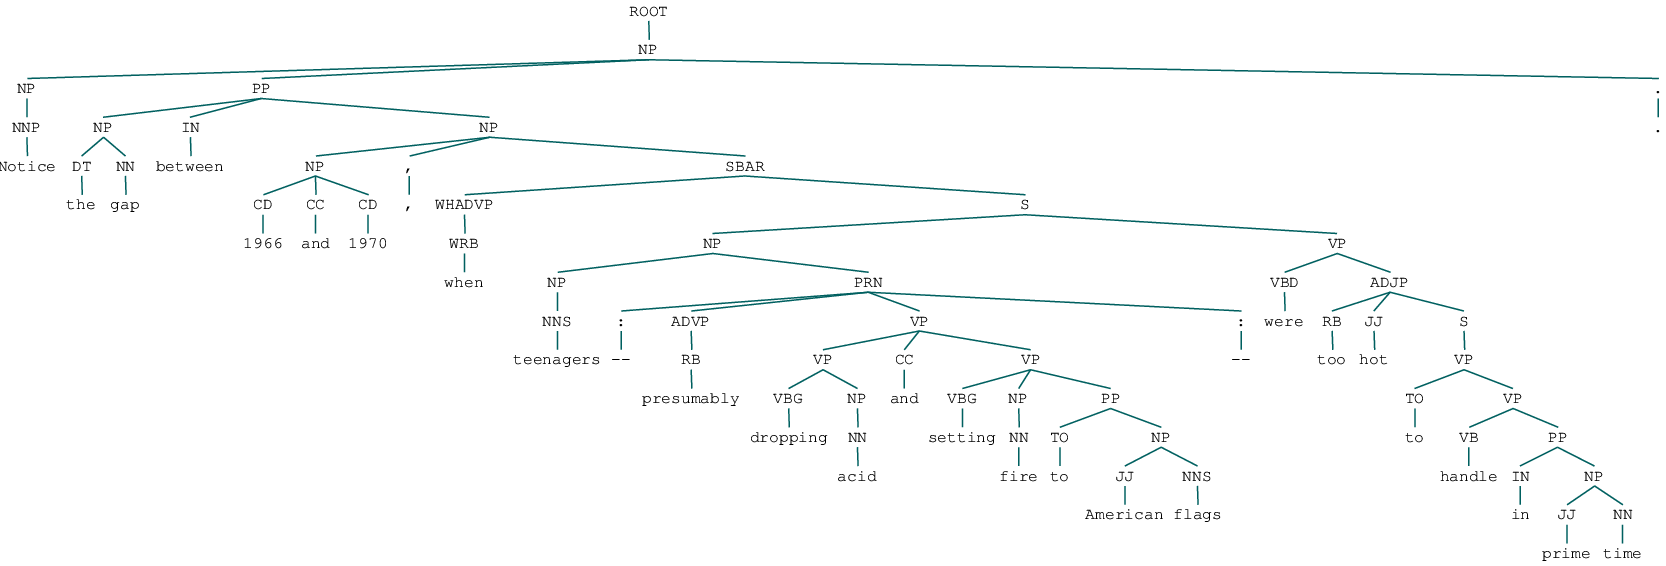

'Text = Notice the gap between 1966 and 1970, when teenagers -- presumably dropping acid and setting fire to American flags -- were too hot to handle in prime time.'

'Code = 145'

'AID = 23748256'

21

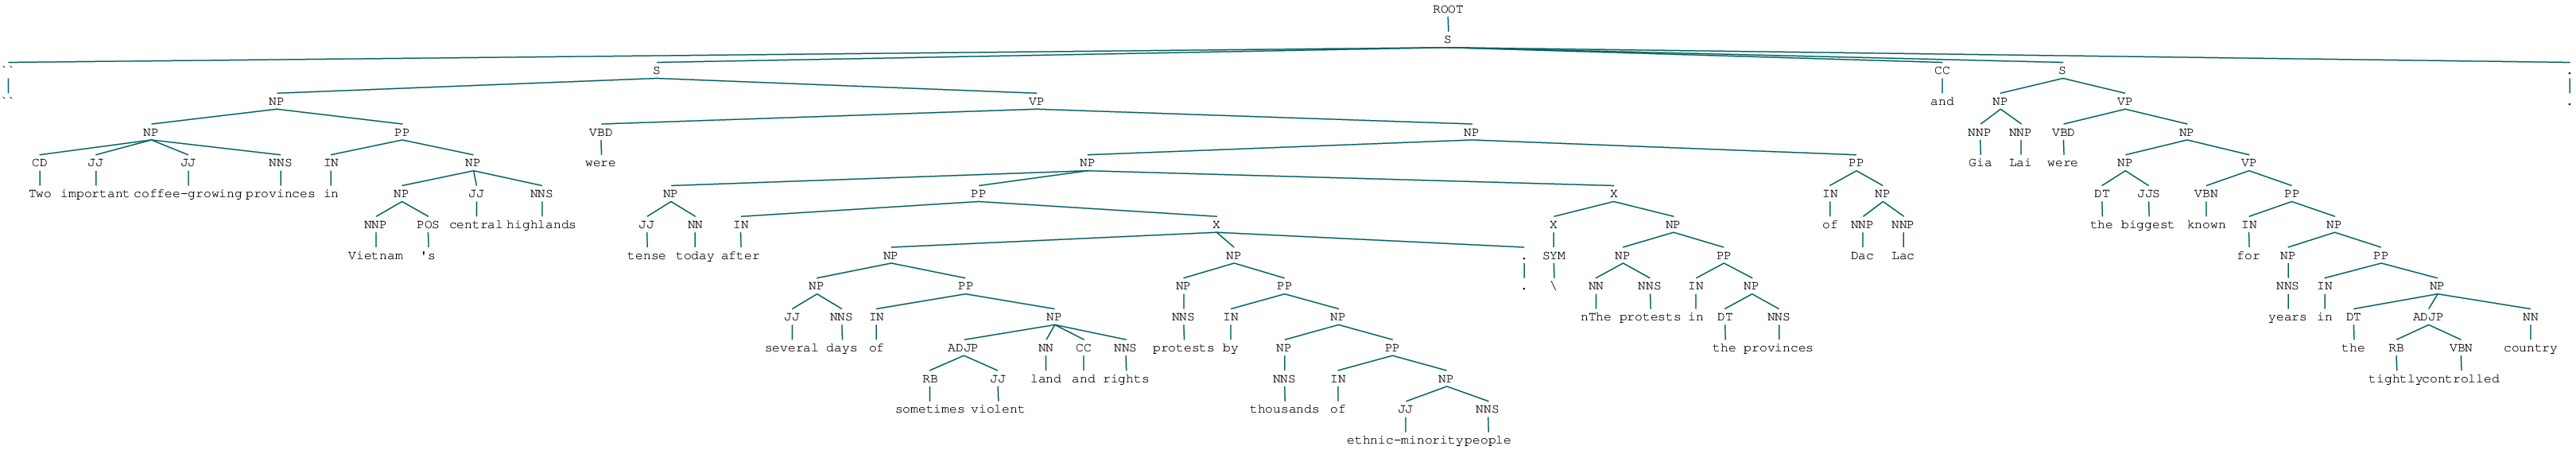

'Text = "Two important coffee-growing provinces in Vietnam\'s central highlands were tense today after several days of sometimes violent land and rights protests by thousands of ethnic-minority people.\\nThe protests in the provinces of Dac Lac and Gia Lai were the biggest known for years in the tightly controlled country.'

'Code = 145'

'AID = 23778449'

22

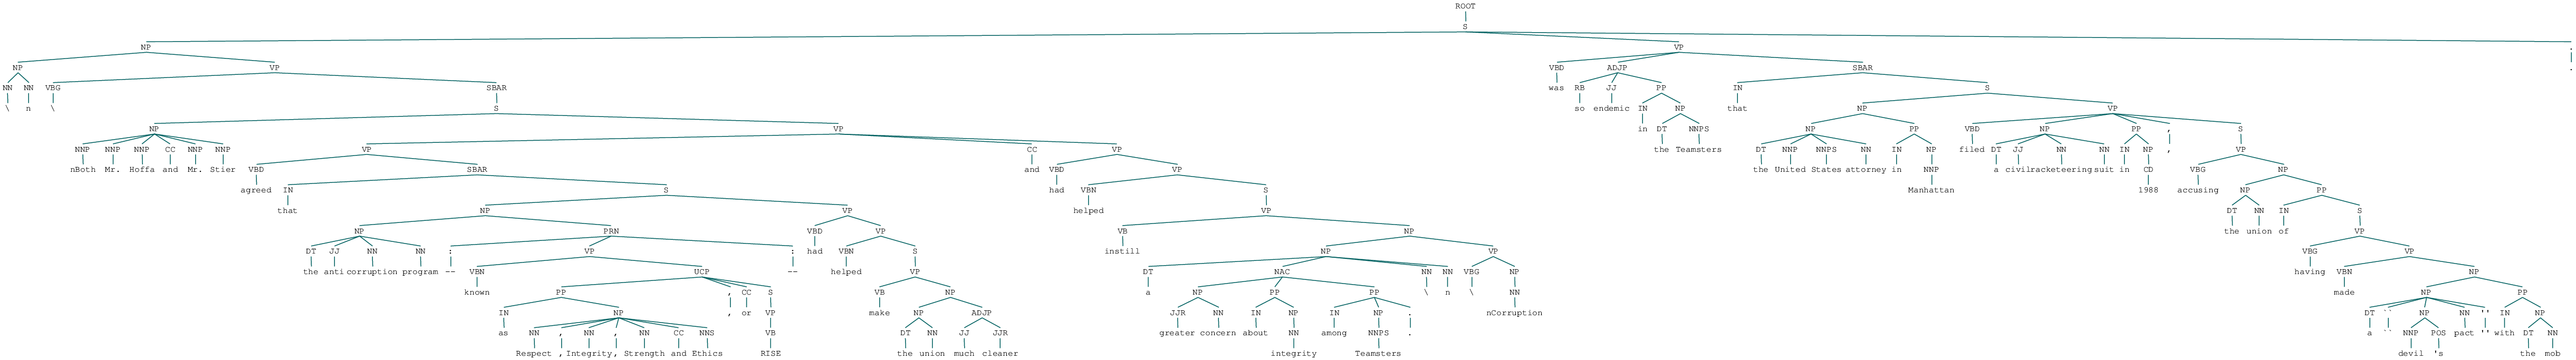

"Text = \\n\\nBoth Mr. Hoffa and Mr. Stier agreed that the anti corruption program -- known as Respect, Integrity, Strength and Ethics, or RISE -- had helped make the union much cleaner and had helped instill a greater concern about integrity among Teamsters.\\n\\nCorruption was so endemic in the Teamsters that the United States attorney in Manhattan filed a civil racketeering suit in 1988, accusing the union of having made a ''devil's pact'' with the mob."

'Code = 145'

'AID = 23966700'

23

In [19]:
for i in range(len(accent3_only[accent3_only.code == '145'])):
    parsed_output(accent3_only[accent3_only.code == '145'], i)
    display(i)

## Look at ACCENT data to identify dictionary improvements

In [20]:
## Create subsets of data discarding identified errors in ACCENT coding

# event code 141
accent3_141 = accent3_only[accent3_only.code == '141'].reset_index(drop = True).drop([0, 2, 6, 8, 10, 11, 21, 23]).reset_index(drop = True)

# event code 143
accent3_143 = accent3_only[accent3_only.code == '143'].reset_index(drop = True).drop([9, 13, 19]).reset_index(drop = True)

# event code 145
accent3_145 = accent3_only[accent3_only.code == '145'].reset_index(drop = True).drop([8, 21, 23]).reset_index(drop = True)

# event code 1723
accent3_1723 = accent3_only[accent3_only.code == '1723'].reset_index(drop = True).drop([8, 12, 15]).reset_index(drop = True)

# event code 181
accent3_181 = accent3_only[accent3_only.code == '181'].reset_index(drop = True).drop([12]).reset_index(drop = True)

# event code 1831
accent3_1831 = accent3_only[accent3_only.code == '1831'].reset_index(drop = True).drop([8]).reset_index(drop = True)

# event code 186
accent3_186 = accent3_only[accent3_only.code == '186'].reset_index(drop = True).drop([9, 12]).reset_index(drop = True)

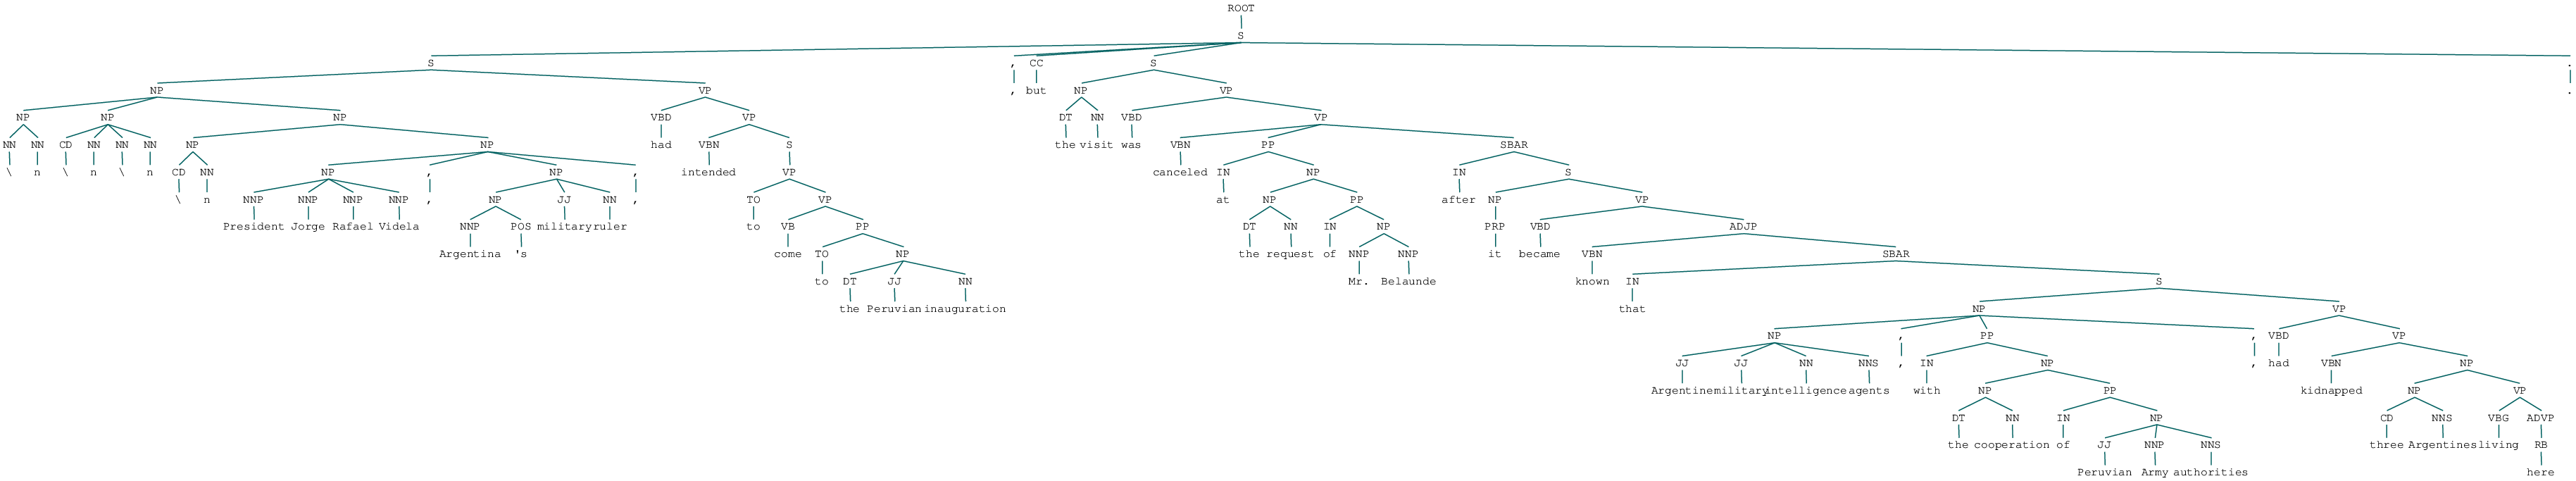

"Text = \\n\\n\\n\\n     President Jorge Rafael Videla, Argentina's military ruler, had intended to come to the Peruvian inauguration, but the visit was canceled at the request of Mr. Belaunde after it became known that Argentine military intelligence agents, with the cooperation of Peruvian Army authorities, had kidnapped three Argentines living here."

'Code = 181'

'AID = 22349193'

0

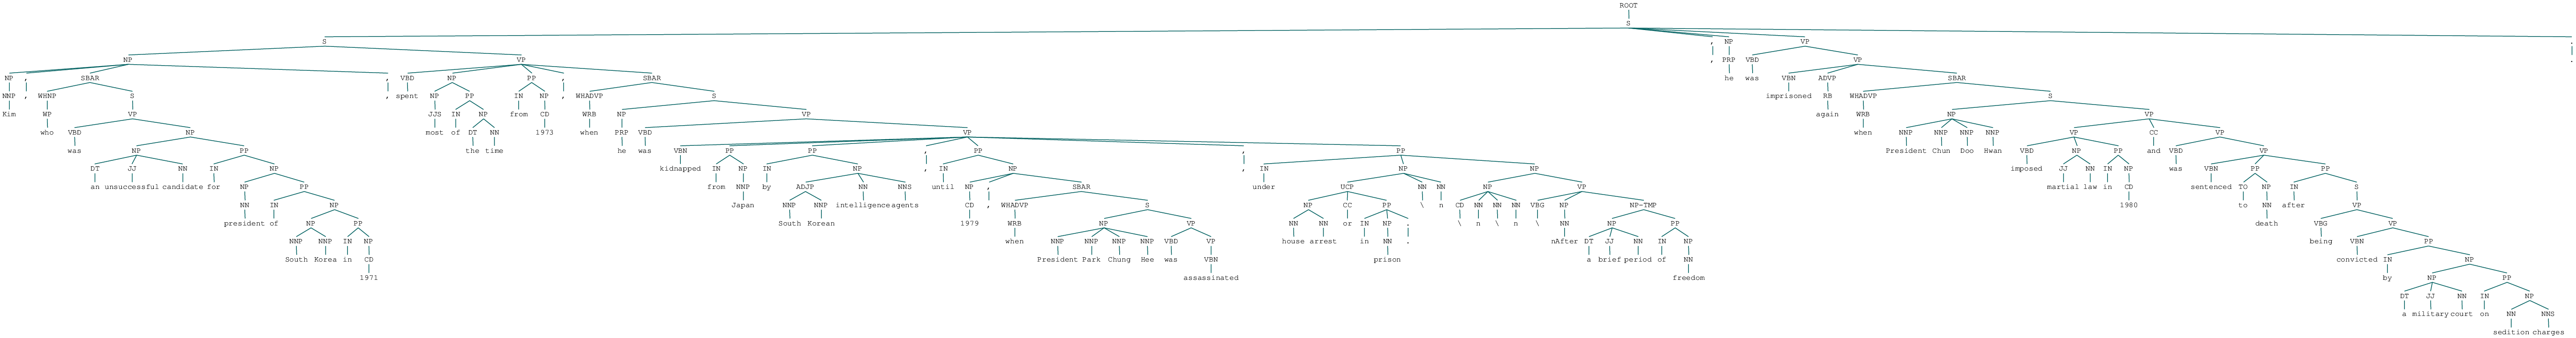

'Text = Kim, who was an unsuccessful candidate for president of South Korea in 1971, spent most of the time from 1973, when he was kidnapped from Japan by South Korean intelligence agents, until 1979, when President Park Chung Hee was assassinated, under house arrest or in prison.\\n\\n\\n\\nAfter a brief period of freedom, he was imprisoned again when President Chun Doo Hwan imposed martial law in 1980 and was sentenced to death after being convicted by a military court on sedition charges.'

'Code = 181'

'AID = 22463952'

1

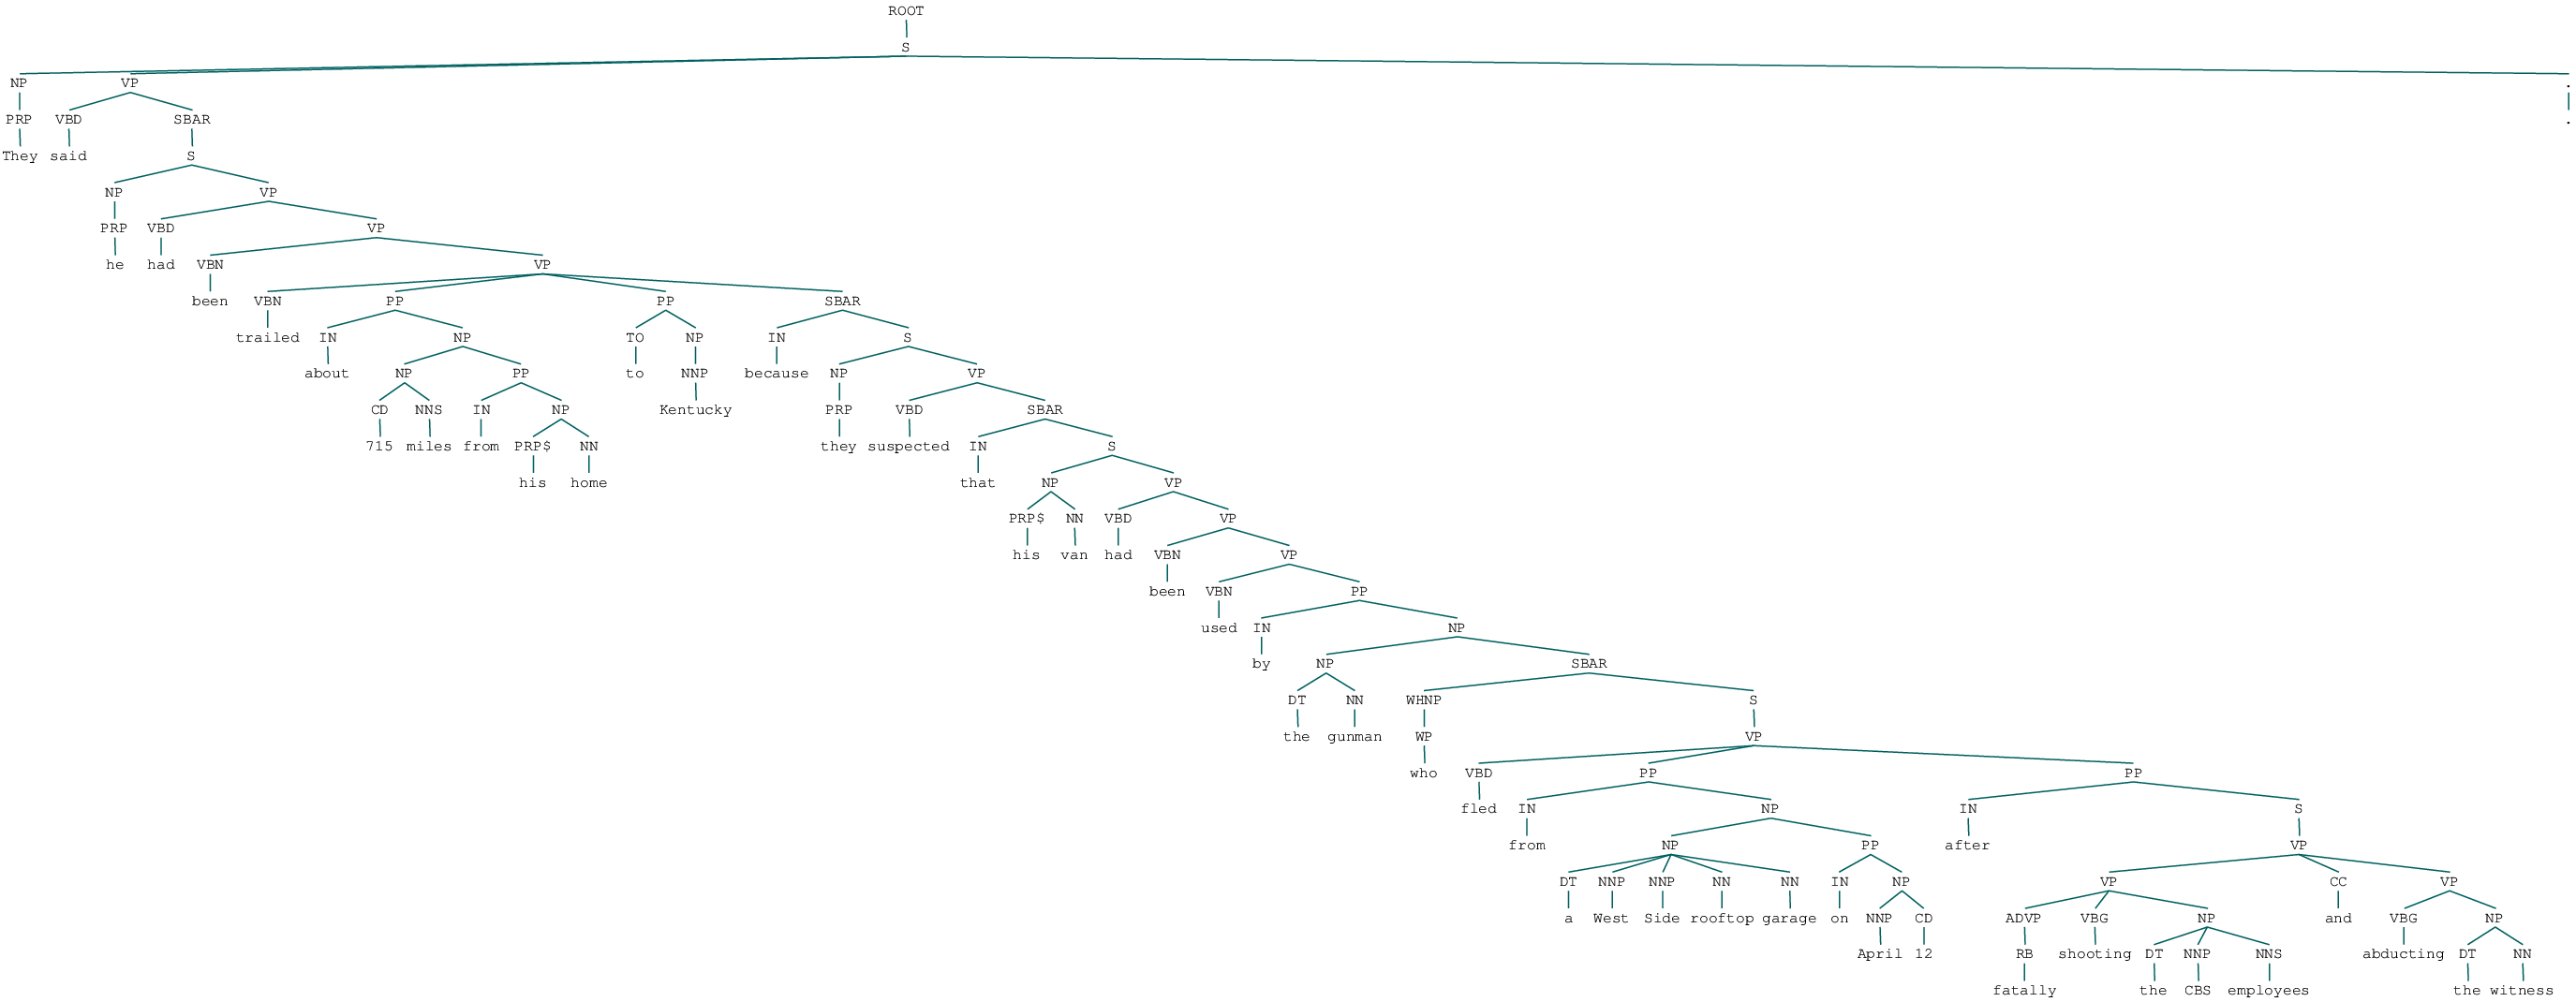

'Text = They said he had been trailed about 715 miles from his home to Kentucky because they suspected that his van had been used by the gunman who fled from a West Side rooftop garage on April 12 after fatally shooting the CBS employees and abducting the witness.'

'Code = 181'

'AID = 22506160'

2

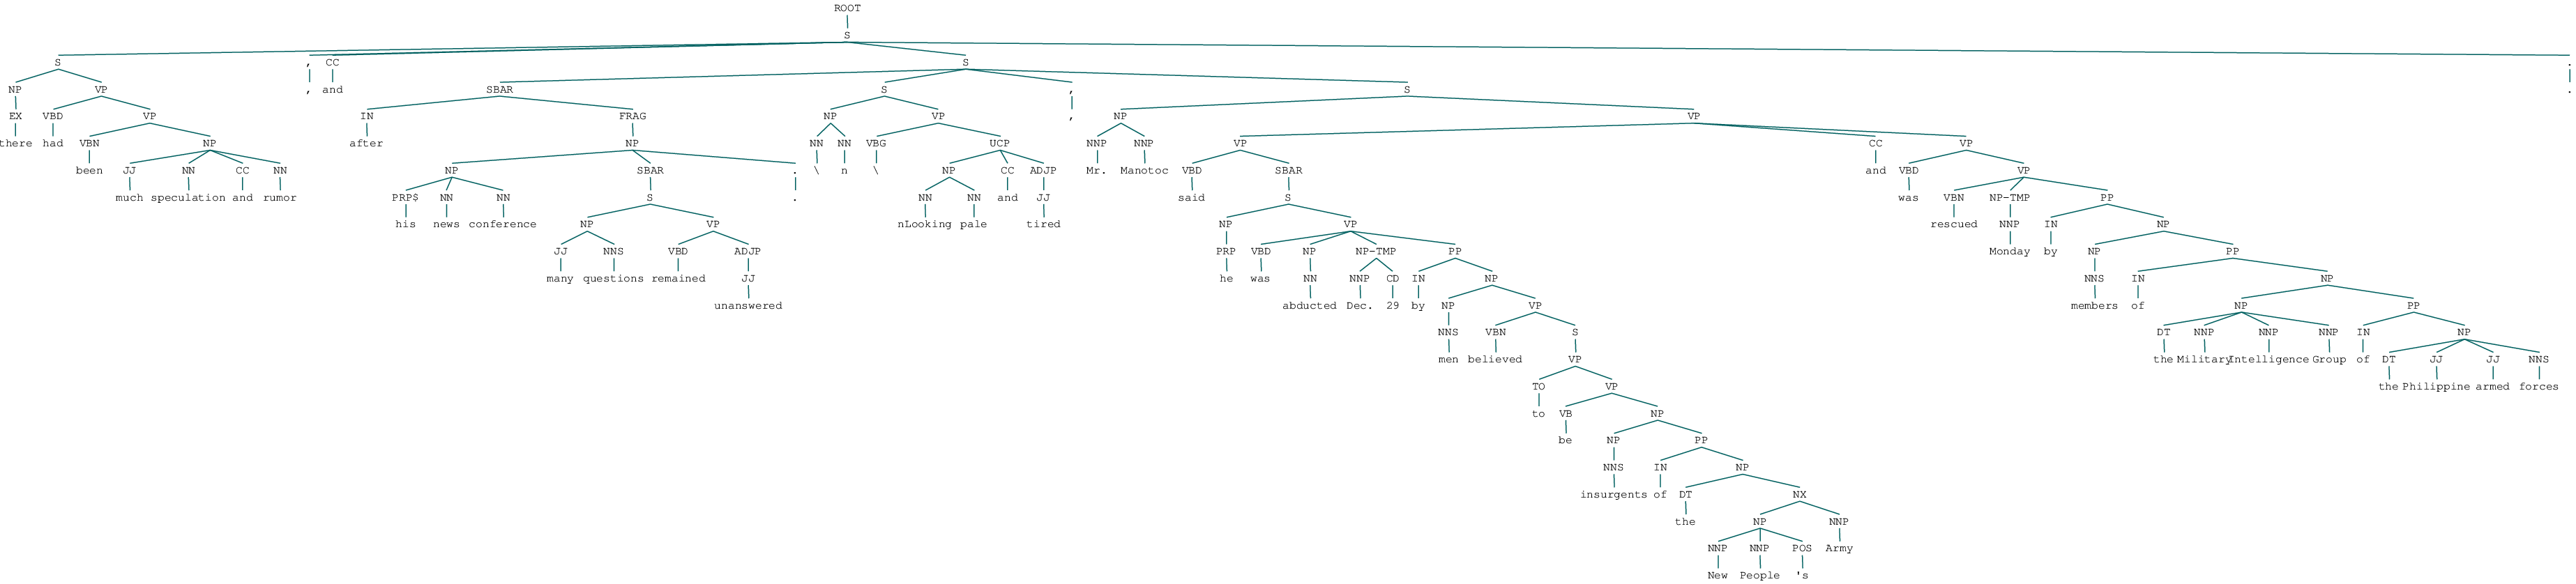

"Text =  there had been much speculation and rumor, and after his news conference many questions remained unanswered.\\n\\nLooking pale and tired, Mr. Manotoc said he was abducted Dec. 29 by men believed to be insurgents of the New People's Army and was rescued Monday by members of the Military Intelligence Group of the Philippine armed forces."

'Code = 181'

'AID = 22516474'

3

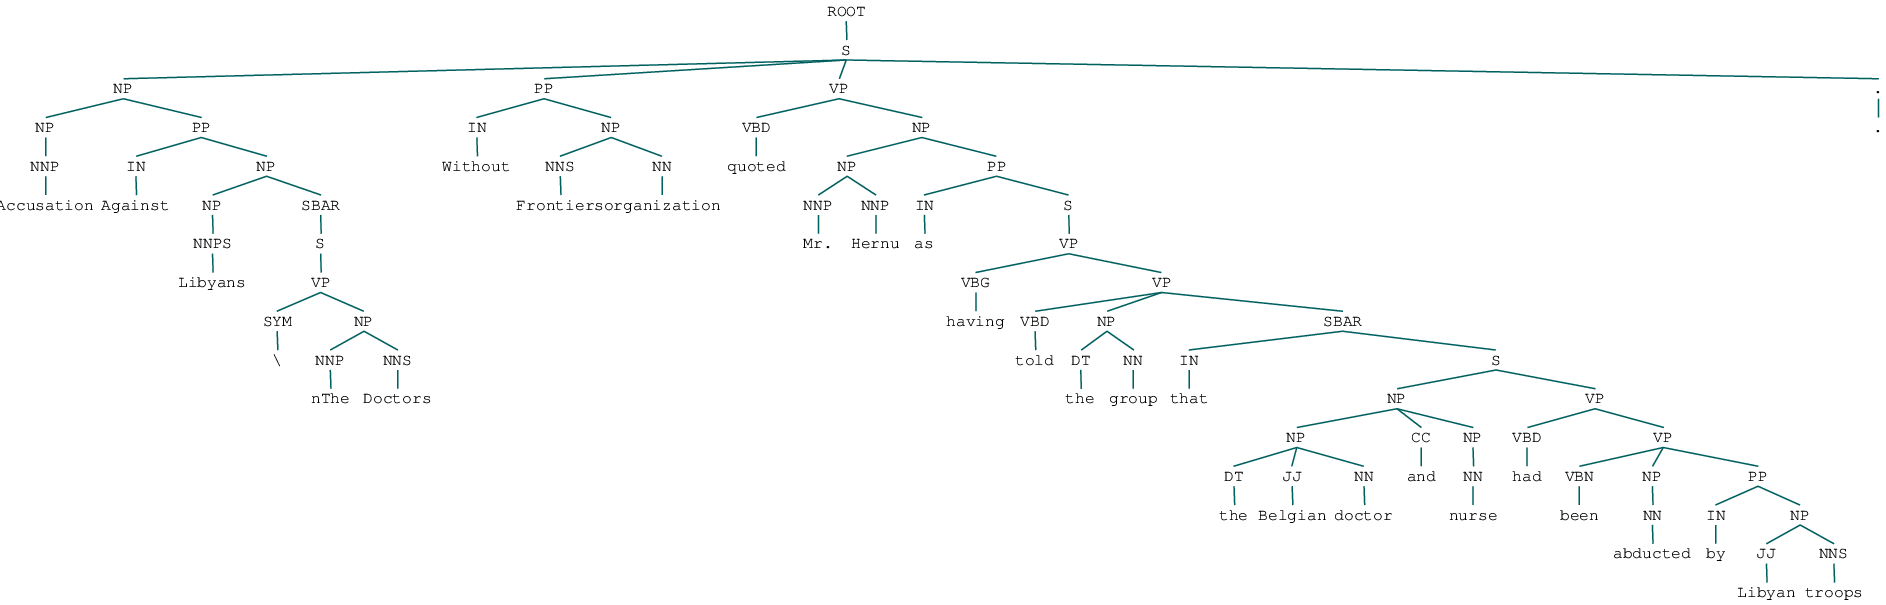

'Text = Accusation Against Libyans \\nThe Doctors Without Frontiers organization quoted Mr. Hernu as having told the group that the Belgian doctor and nurse had been abducted by Libyan troops.'

'Code = 181'

'AID = 22618219'

4

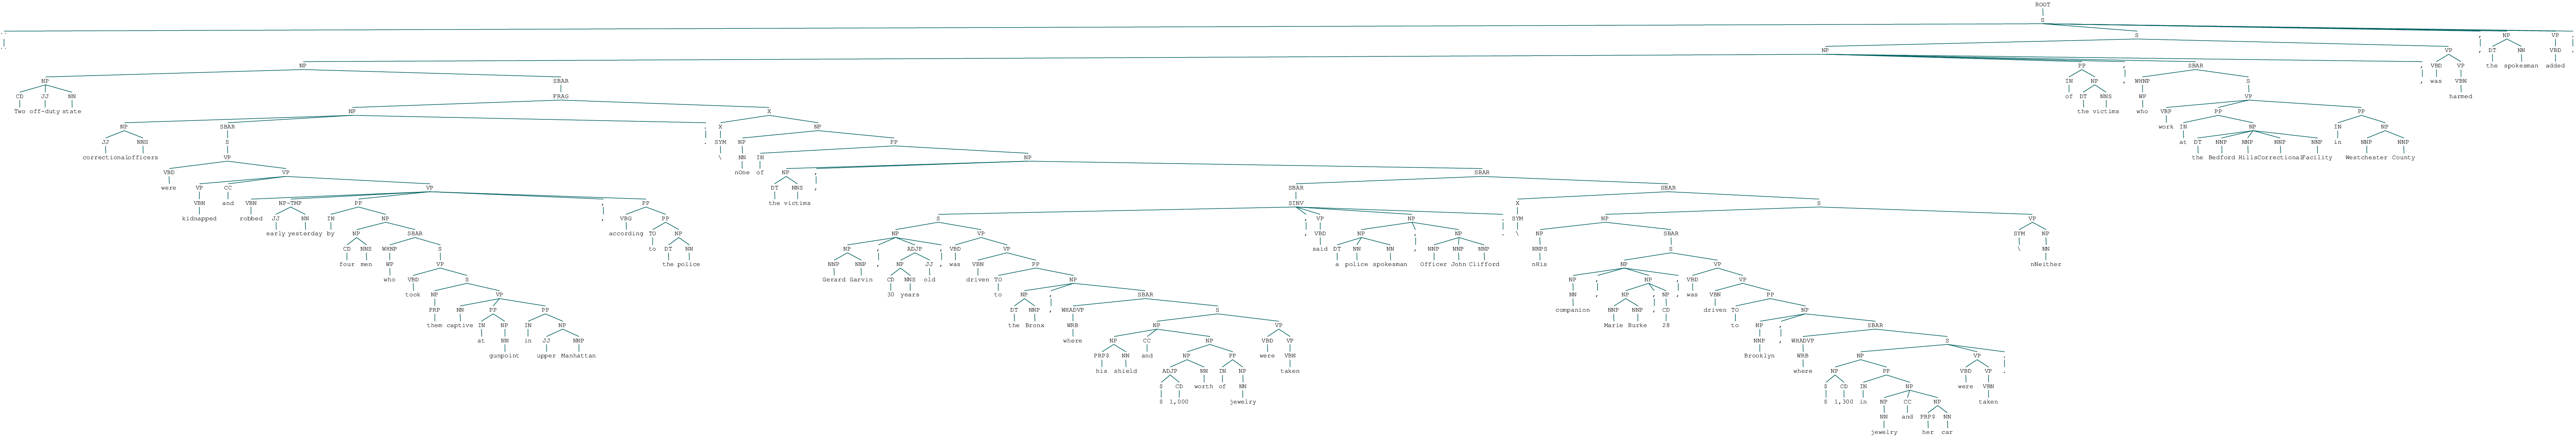

'Text = "Two off-duty state correctional officers were kidnapped and robbed early yesterday by four men who took them captive at gunpoint in upper Manhattan, according to the police.\\nOne of the victims, Gerard Garvin, 30 years old, was driven to the Bronx, where his shield and $1,000 worth of jewelry were taken, said a police spokesman, Officer John Clifford.\\nHis companion, Marie Burke, 28, was driven to Brooklyn, where $1,300 in jewelry and her car were taken.\\nNeither of the victims, who work at the Bedford Hills Correctional Facility in Westchester County, was harmed, the spokesman added.'

'Code = 181'

'AID = 22643149'

5

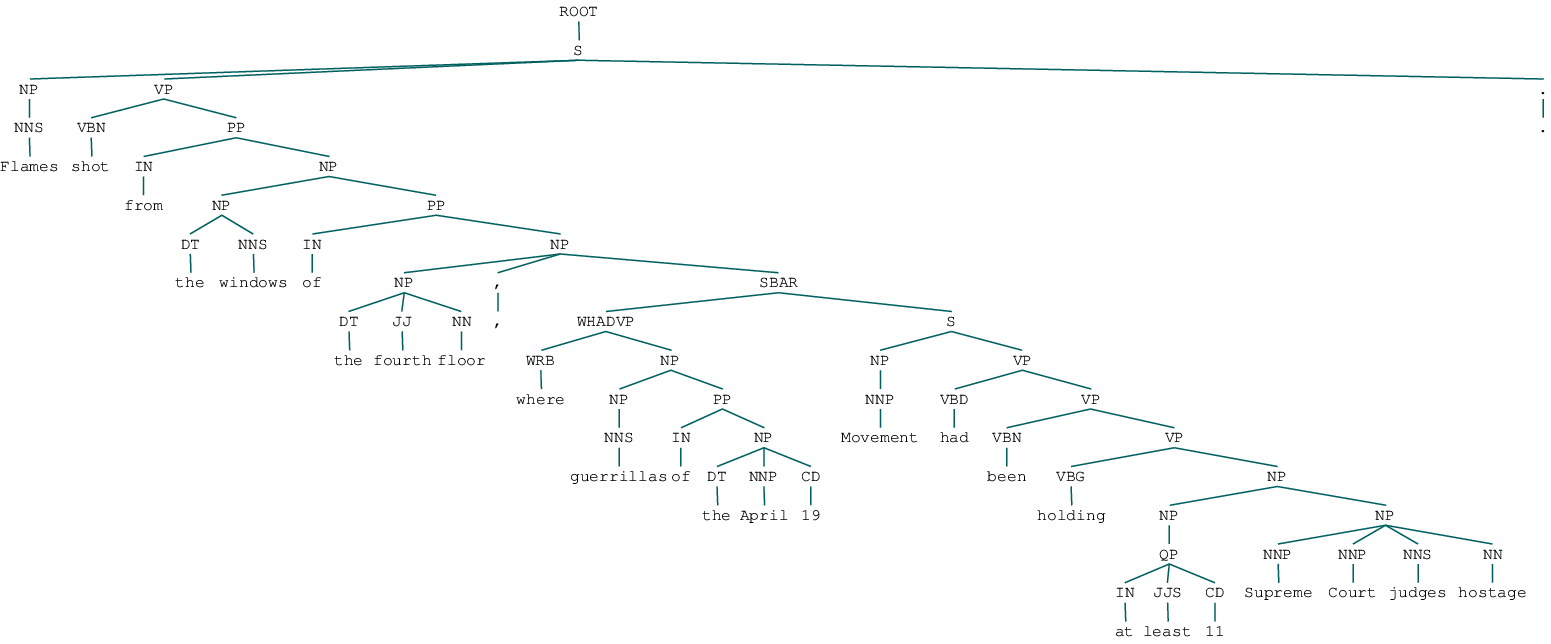

'Text = Flames shot from the windows of the fourth floor, where guerrillas of the April 19 Movement had been holding at least 11 Supreme Court judges hostage.'

'Code = 181'

'AID = 22661249'

6

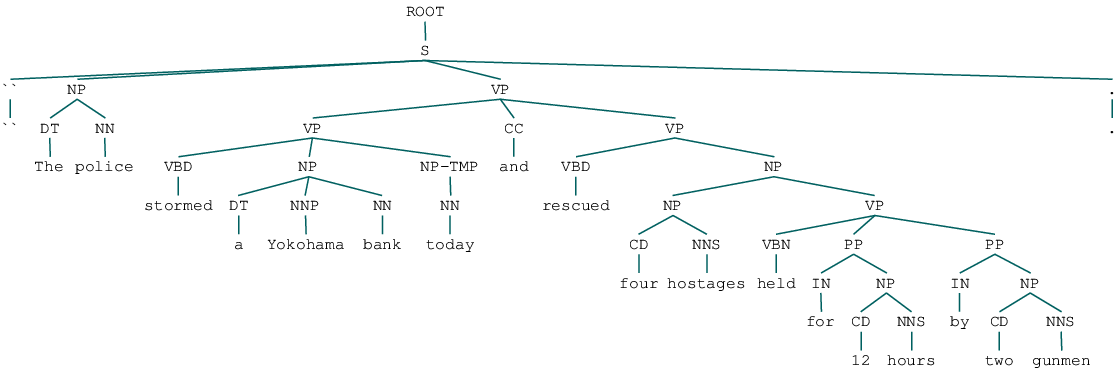

'Text = "The police stormed a Yokohama bank today and rescued four hostages held for 12 hours by two gunmen.'

'Code = 181'

'AID = 22676232'

7

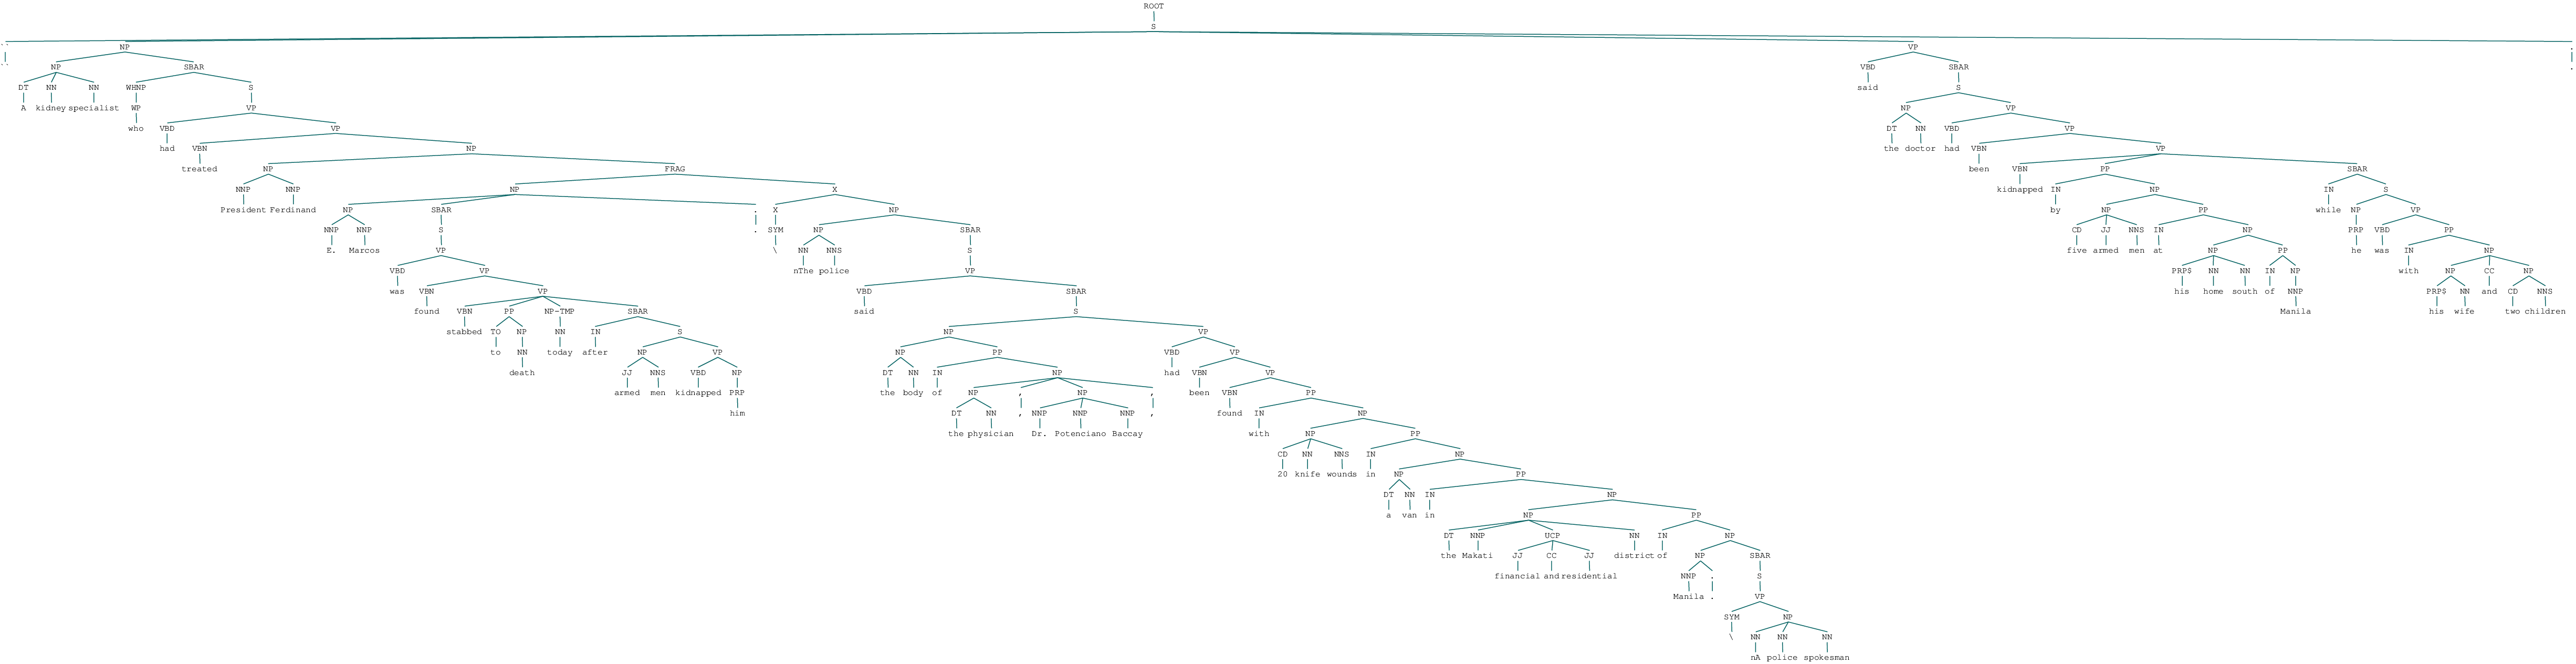

'Text = "A kidney specialist who had treated President Ferdinand E. Marcos was found stabbed to death today after armed men kidnapped him.\\nThe police said the body of the physician, Dr. Potenciano Baccay, had been found with 20 knife wounds in a van in the Makati financial and residential district of Manila.\\nA police spokesman said the doctor had been kidnapped by five armed men at his home south of Manila while he was with his wife and two children.'

'Code = 181'

'AID = 22705330'

8

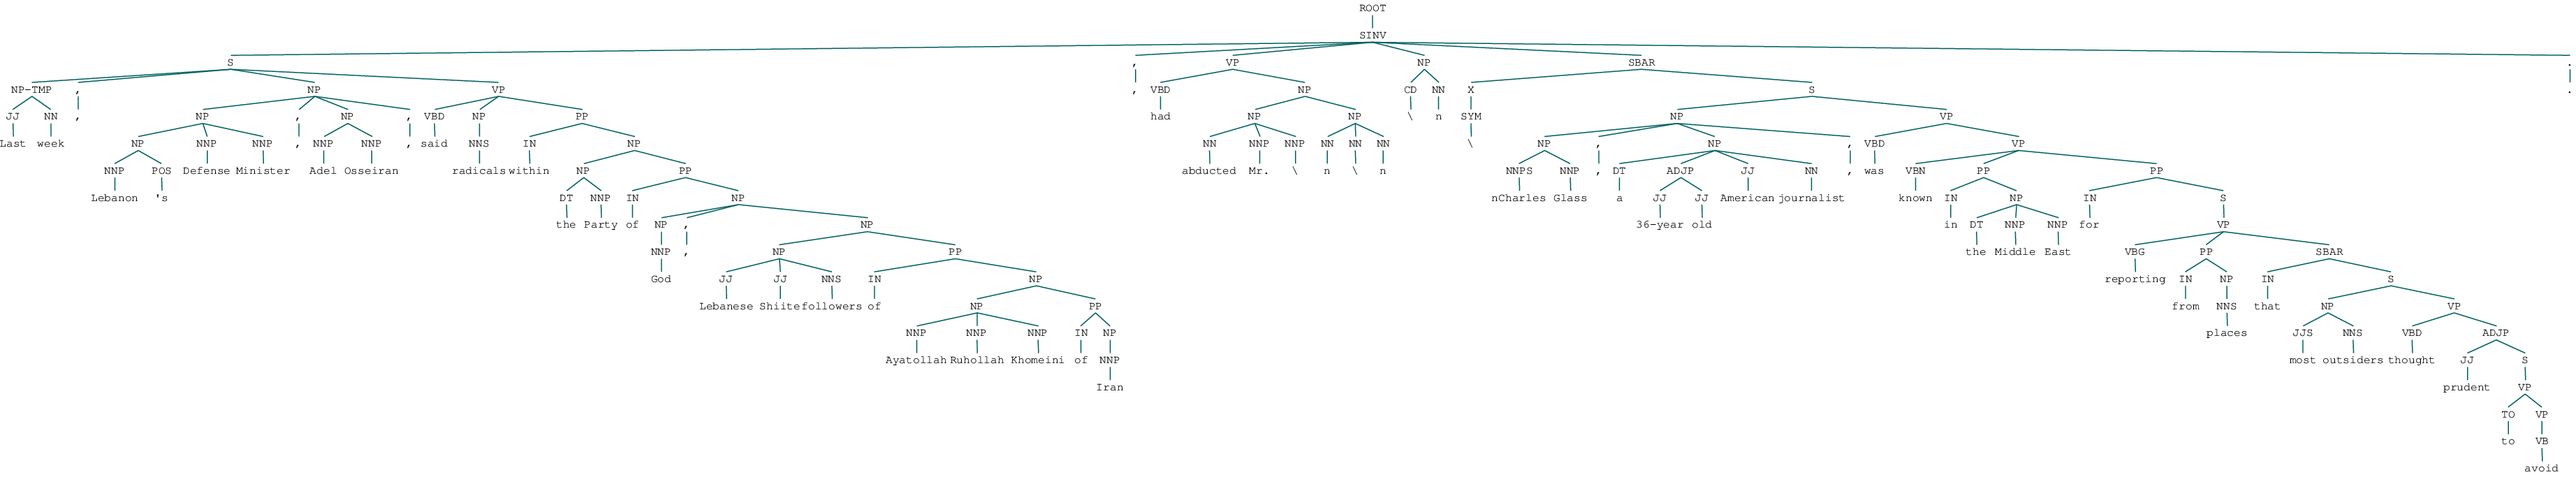

"Text = Last week, Lebanon's Defense Minister, Adel Osseiran, said radicals within the Party of God, Lebanese Shiite followers of Ayatollah Ruhollah Khomeini of Iran, had abducted Mr.  \\n\\n\\n\\nCharles Glass, a 36-year old American journalist, was known in the Middle East for reporting from places that most outsiders thought prudent to avoid."

'Code = 181'

'AID = 22853071'

9

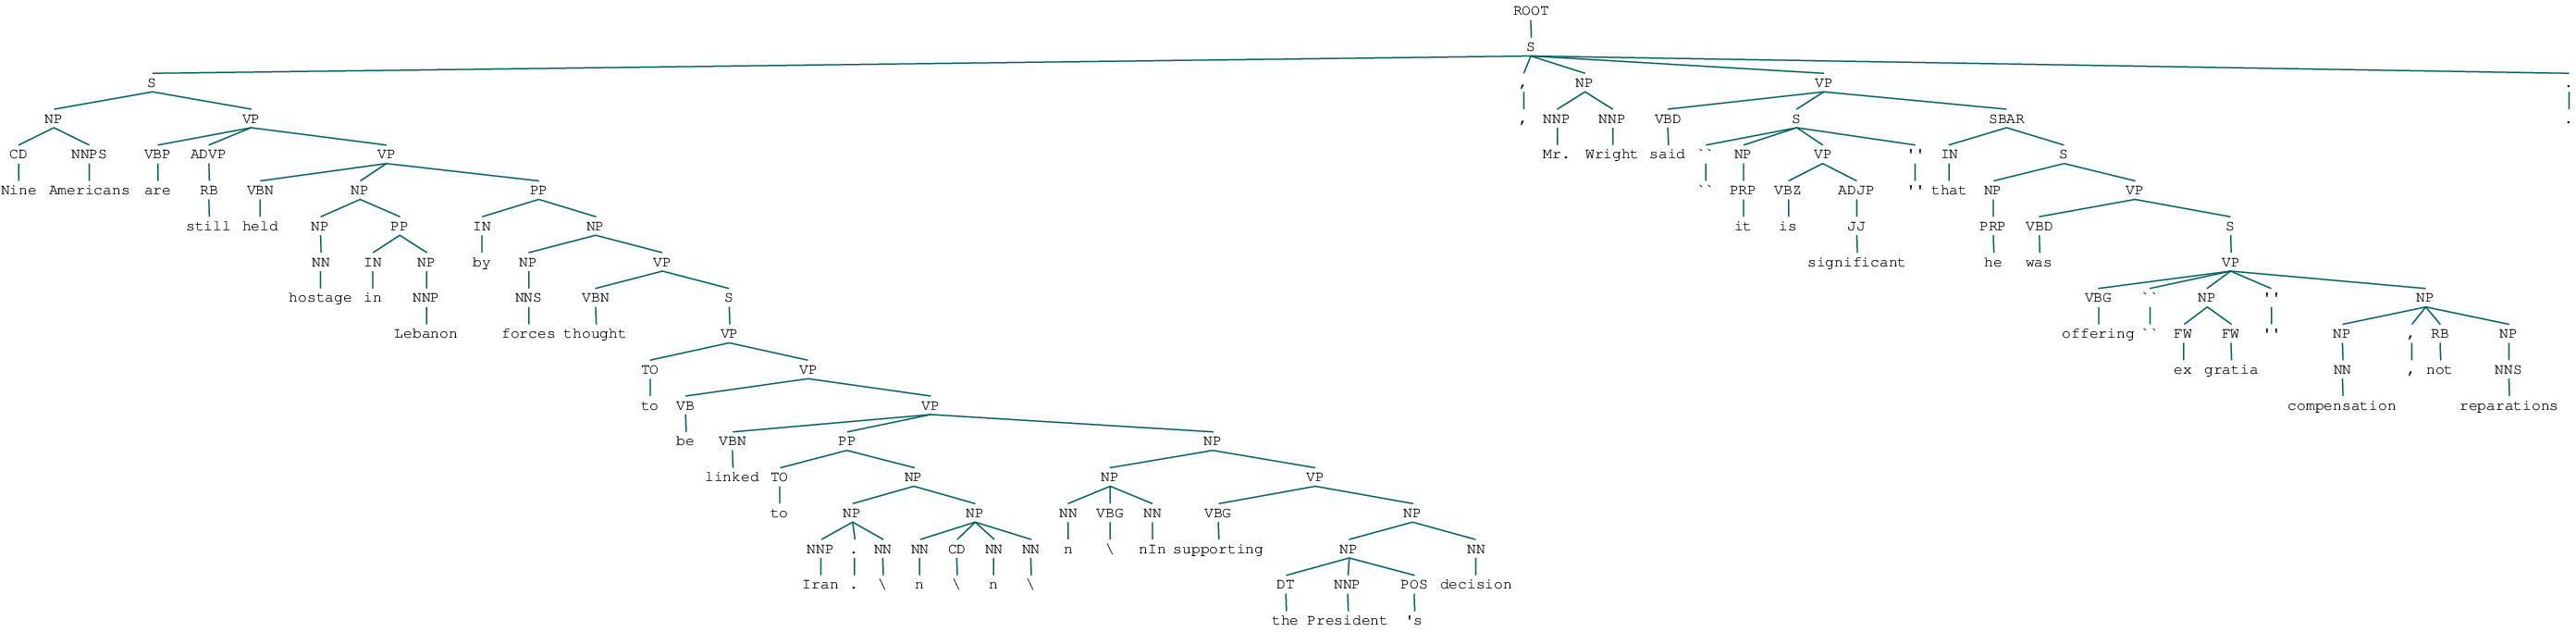

"Text = Nine Americans are still held hostage in Lebanon by forces thought to be linked to Iran.\\n\\n\\n\\nIn supporting the President's decision, Mr. Wright said ''it is significant'' that he was offering ''ex gratia'' compensation, not reparations."

'Code = 181'

'AID = 22909210'

10

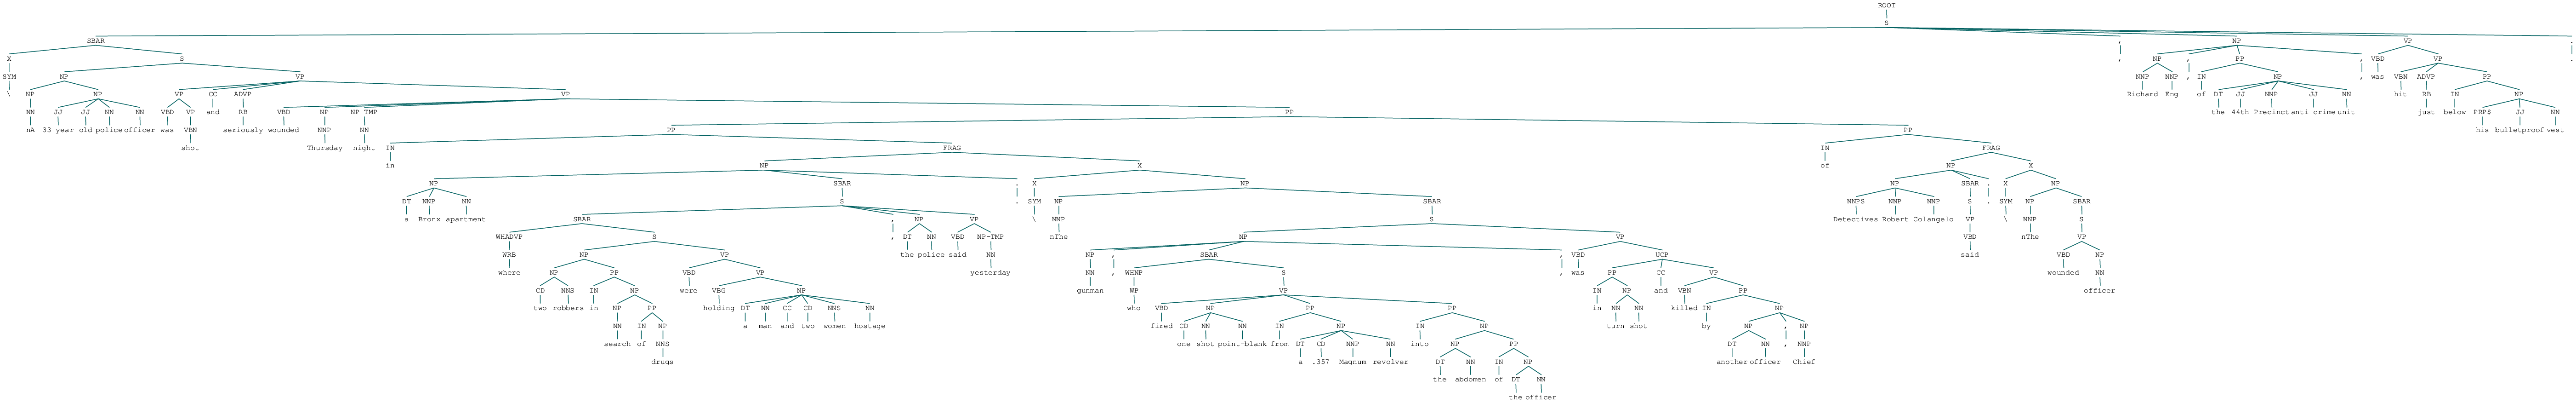

'Text = \\nA 33-year old police officer was shot and seriously wounded Thursday night in a Bronx apartment where two robbers in search of drugs were holding a man and two women hostage, the police said yesterday.\\nThe gunman, who fired one shot point-blank from a .357 Magnum revolver into the abdomen of the officer, was in turn shot and killed by another officer, Chief of Detectives Robert Colangelo said.\\nThe wounded officer, Richard Eng, of the 44th Precinct anti-crime unit, was hit just below his bulletproof vest.'

'Code = 181'

'AID = 22912213'

11

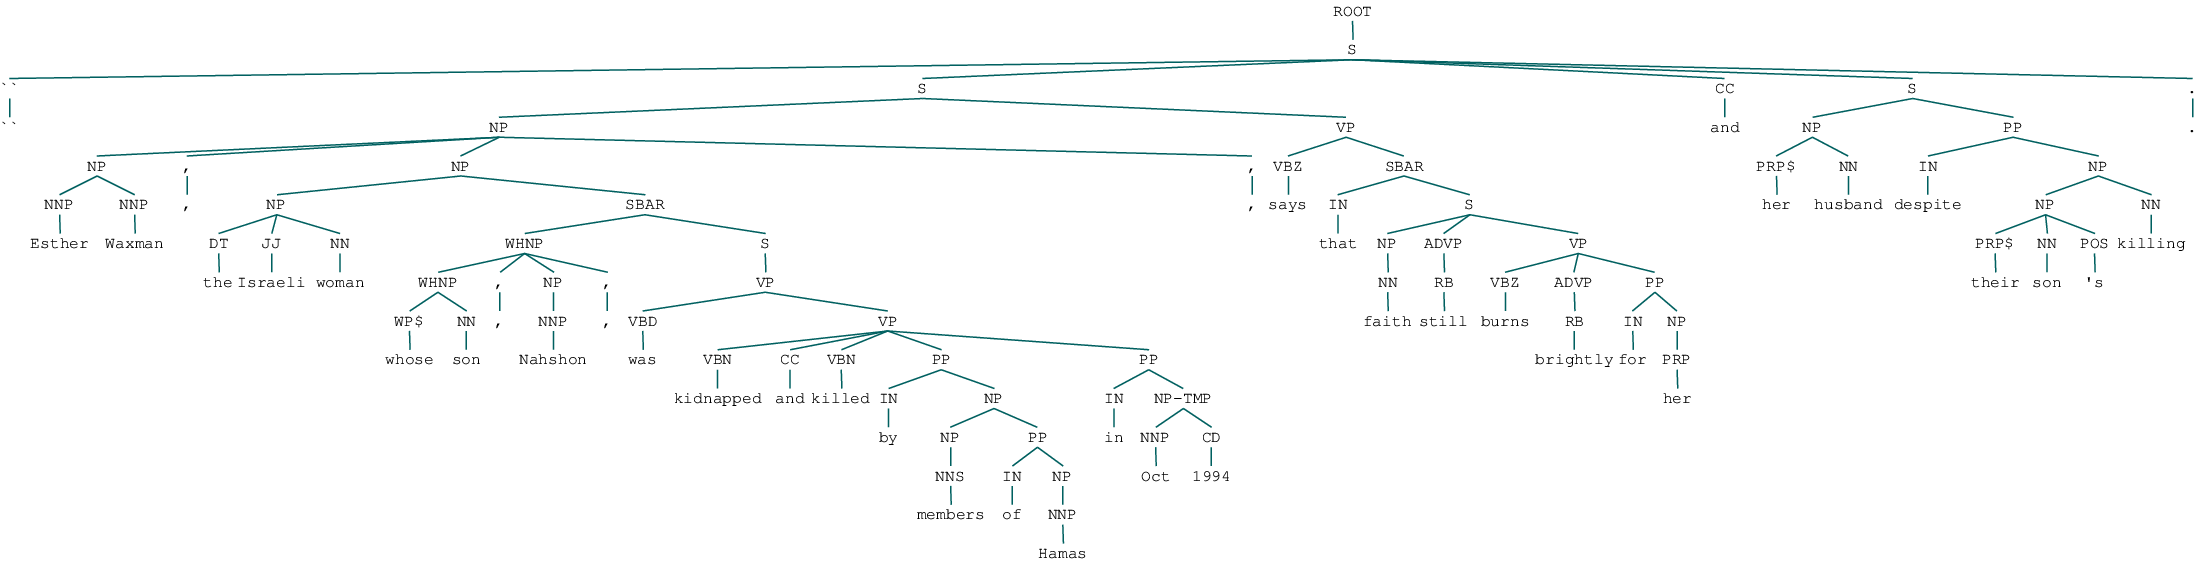

'Text = "Esther Waxman, the Israeli woman whose son, Nahshon, was kidnapped and killed by members of Hamas in Oct 1994, says that faith still burns brightly for her and her husband despite their son\'s killing.'

'Code = 181'

'AID = 23353911'

12

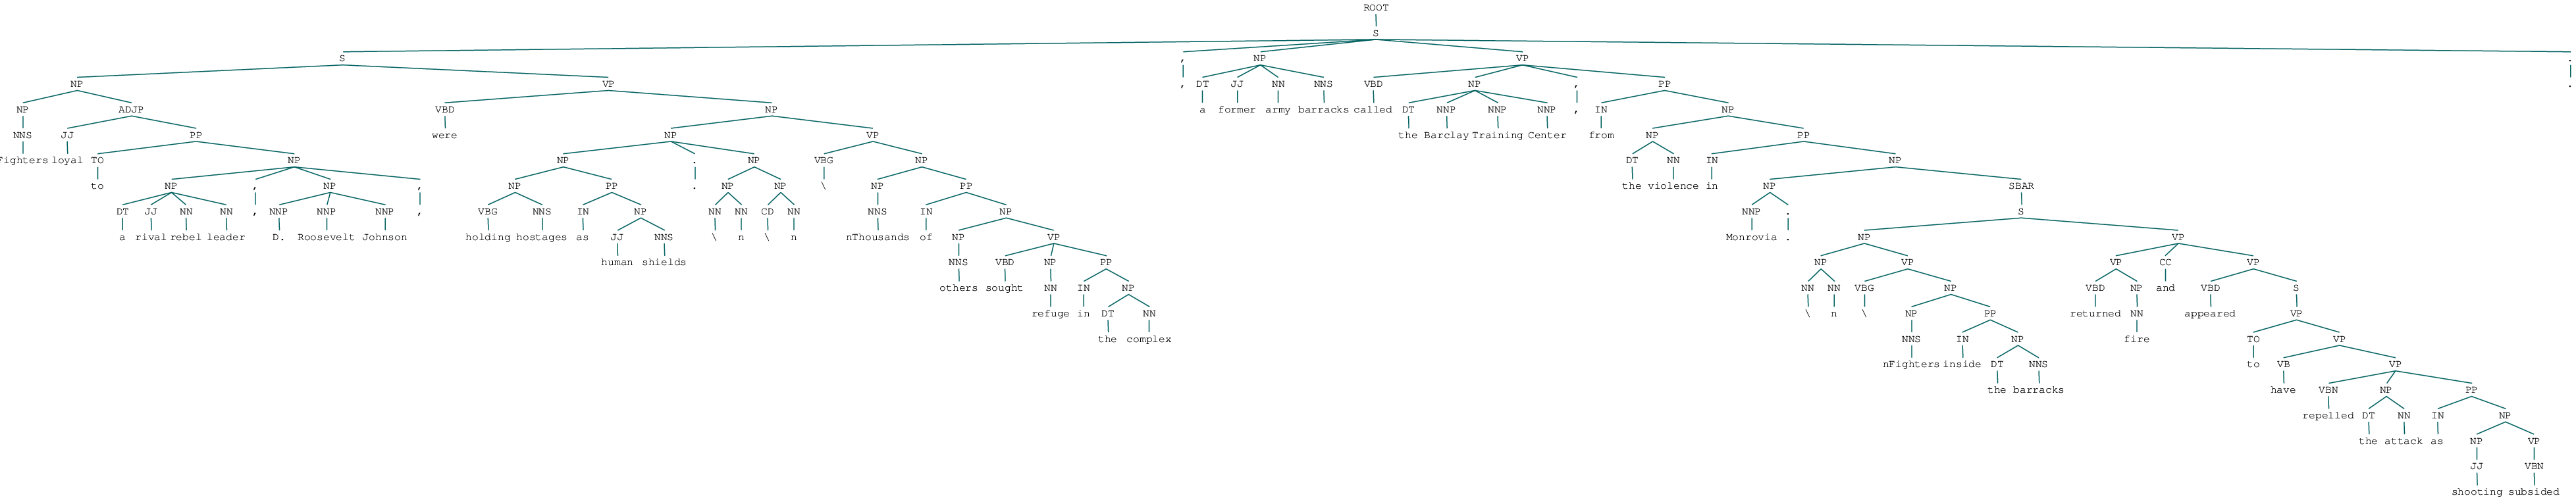

'Text = Fighters loyal to a rival rebel leader, D. Roosevelt Johnson, were holding hostages as human shields.\\n\\n\\nThousands of others sought refuge in the complex, a former army barracks called the Barclay Training Center, from the violence in Monrovia.\\n\\nFighters inside the barracks returned fire and appeared to have repelled the attack as shooting subsided.'

'Code = 181'

'AID = 23518627'

13

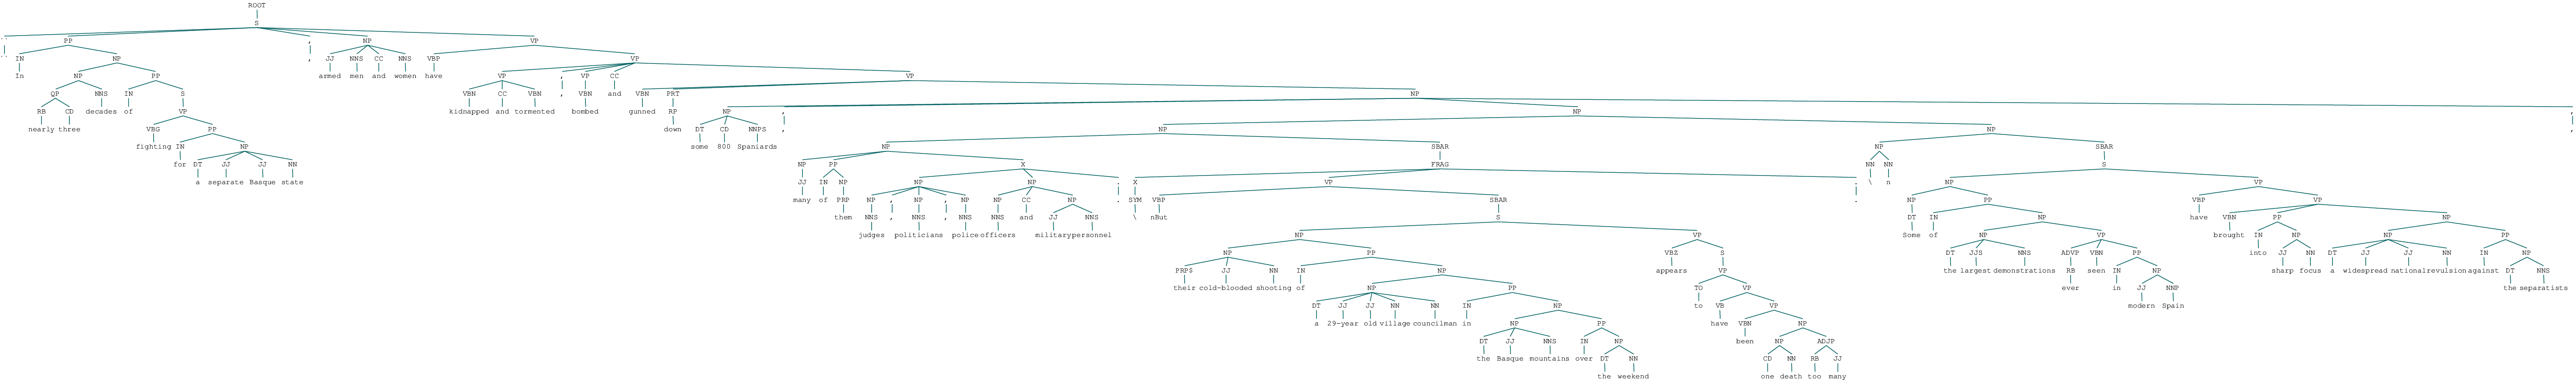

'Text = "In nearly three decades of fighting for a separate Basque state, armed men and women have kidnapped and tormented, bombed and gunned down some 800 Spaniards, many of them judges, politicians, police officers and military personnel.\\nBut their cold-blooded shooting of a 29-year old village councilman in the Basque mountains over the weekend appears to have been one death too many.\\n  Some of the largest demonstrations ever seen in modern Spain have brought into sharp focus a widespread national revulsion against the separatists,'

'Code = 181'

'AID = 23545683'

14

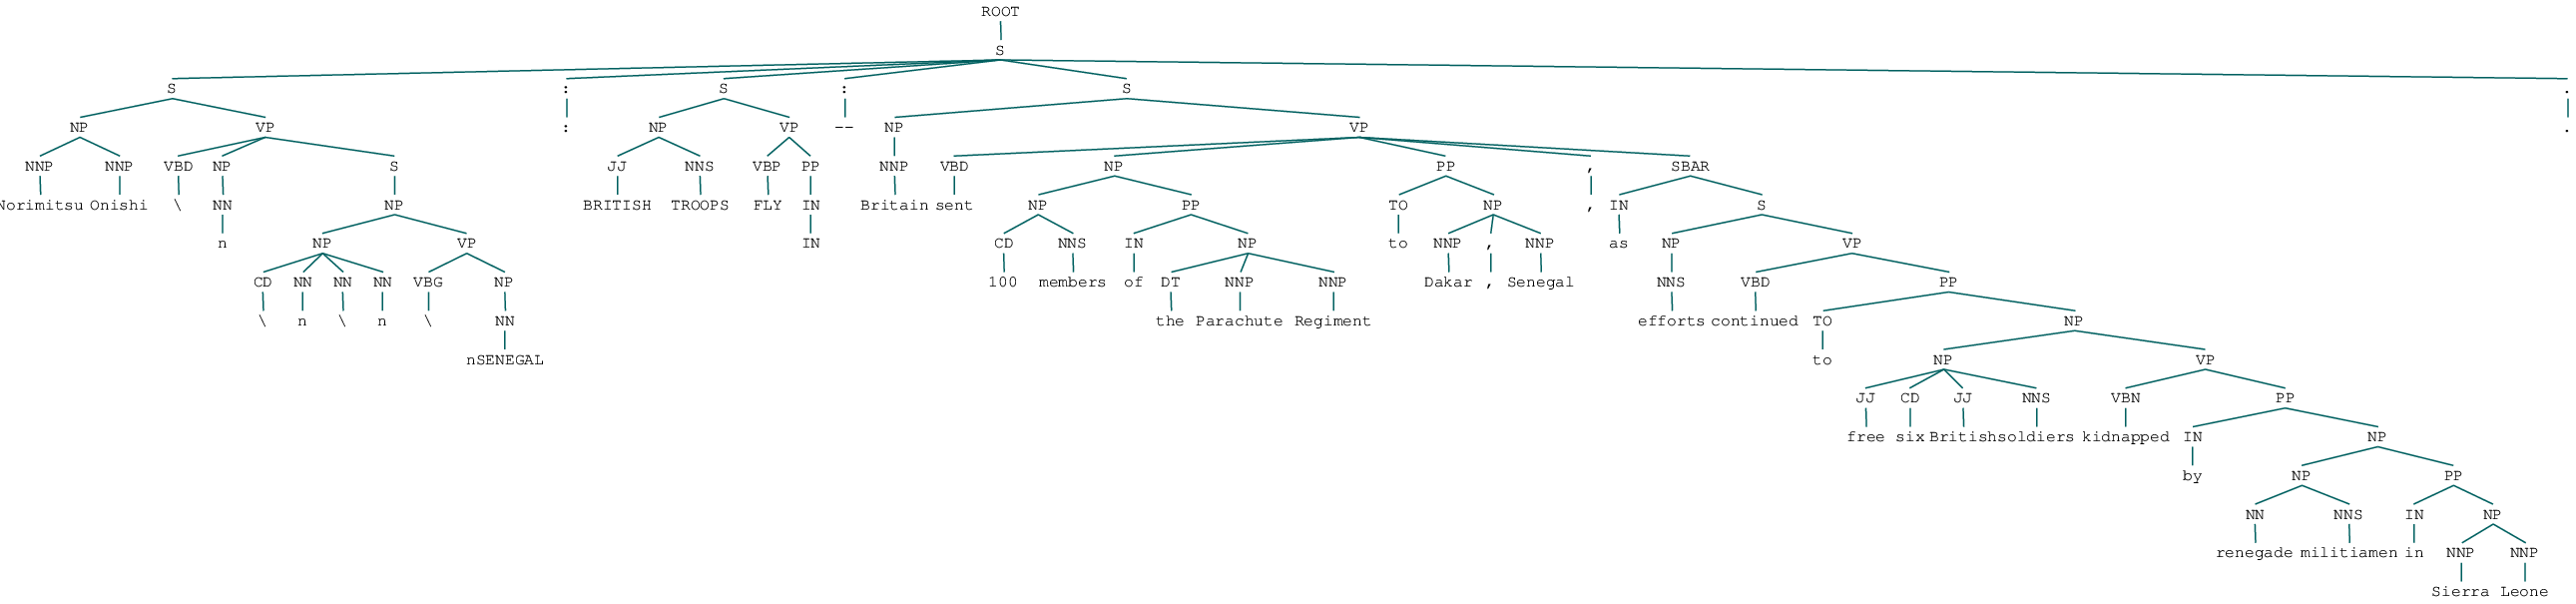

'Text = Norimitsu Onishi\\n\\n\\n\\nSENEGAL: BRITISH TROOPS FLY IN -- Britain sent 100 members of the Parachute Regiment to Dakar, Senegal, as efforts continued to free six British soldiers kidnapped by renegade militiamen in Sierra Leone.'

'Code = 181'

'AID = 23764788'

15

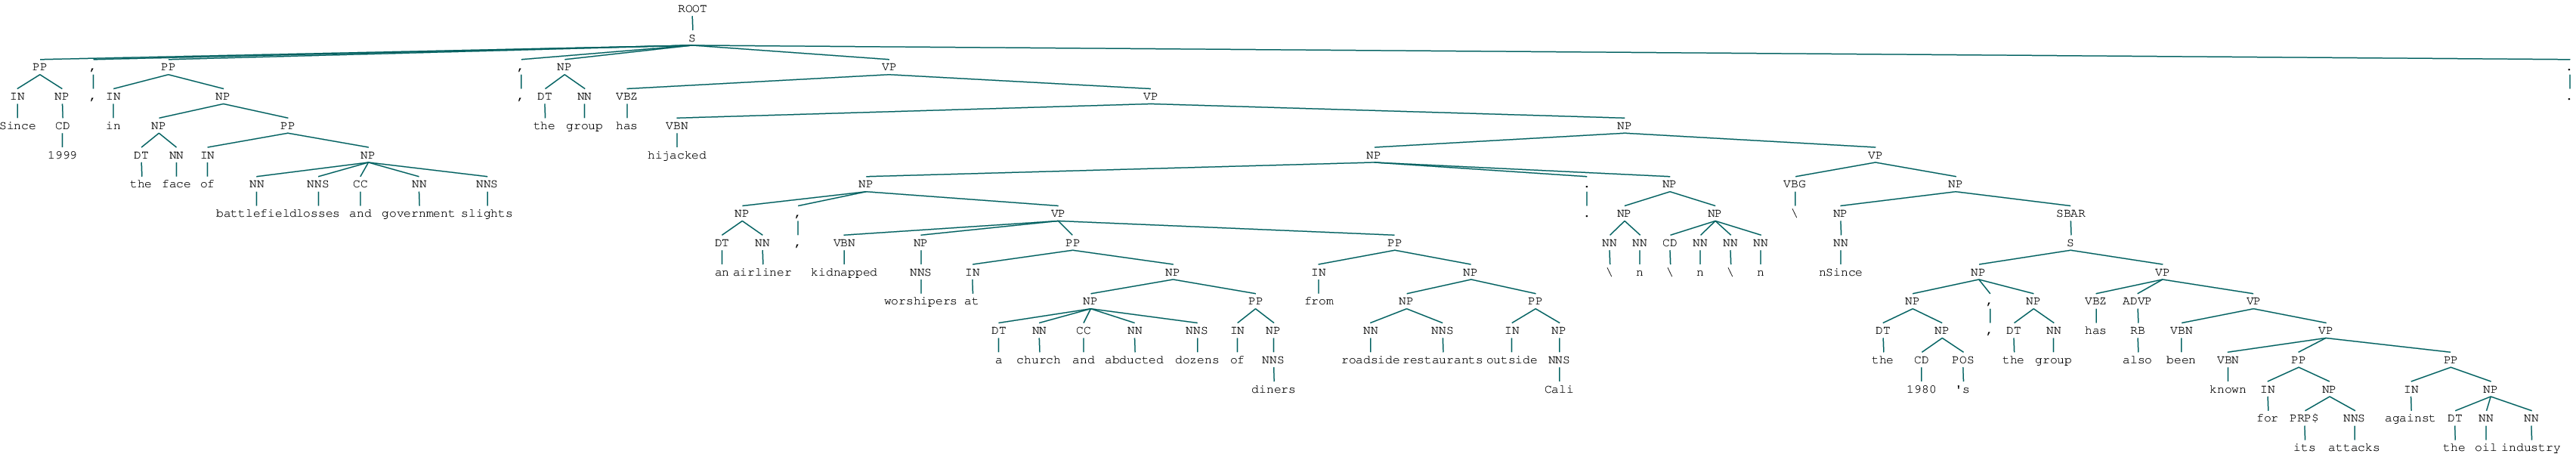

"Text = Since 1999, in the face of battlefield losses and government slights, the group has hijacked an airliner, kidnapped worshipers at a church and abducted dozens of diners from roadside restaurants outside Cali.\\n\\n\\n\\nSince the 1980's, the group has also been known for its attacks against the oil industry."

'Code = 181'

'AID = 23795602'

16

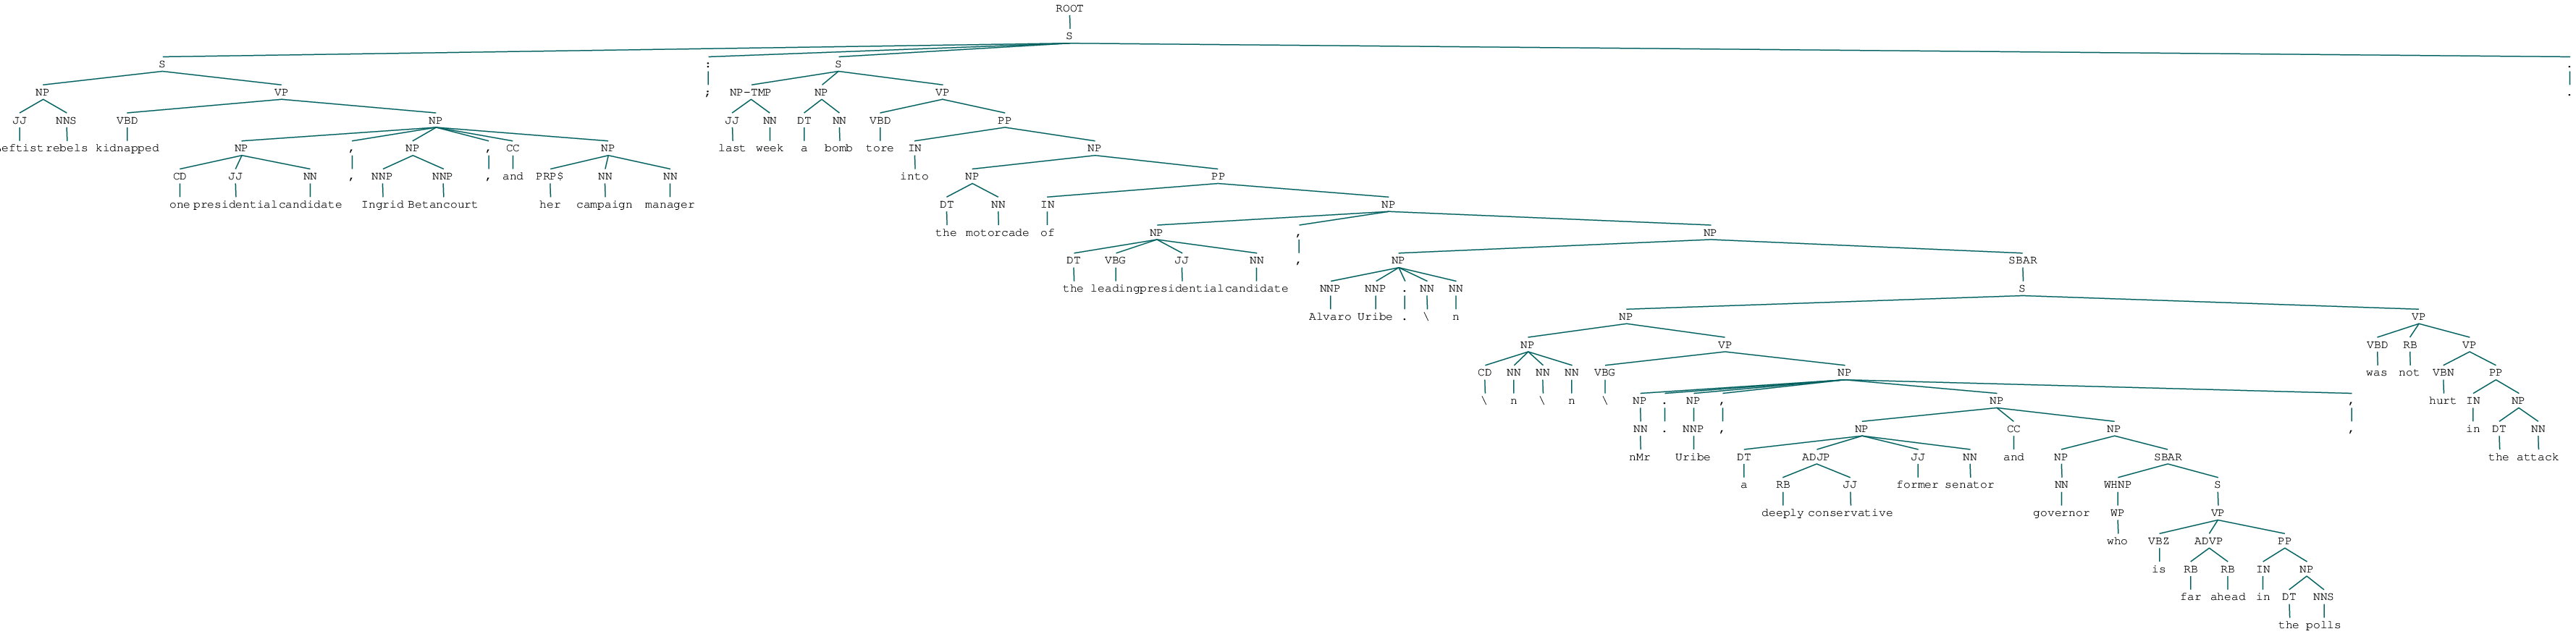

'Text = Leftist rebels kidnapped one presidential candidate, Ingrid Betancourt, and her campaign manager; last week a bomb tore into the motorcade of the leading presidential candidate, Alvaro Uribe.\\n\\n\\n\\nMr. Uribe, a deeply conservative former senator and governor who is far ahead in the polls, was not hurt in the attack.'

'Code = 181'

'AID = 23841988'

17

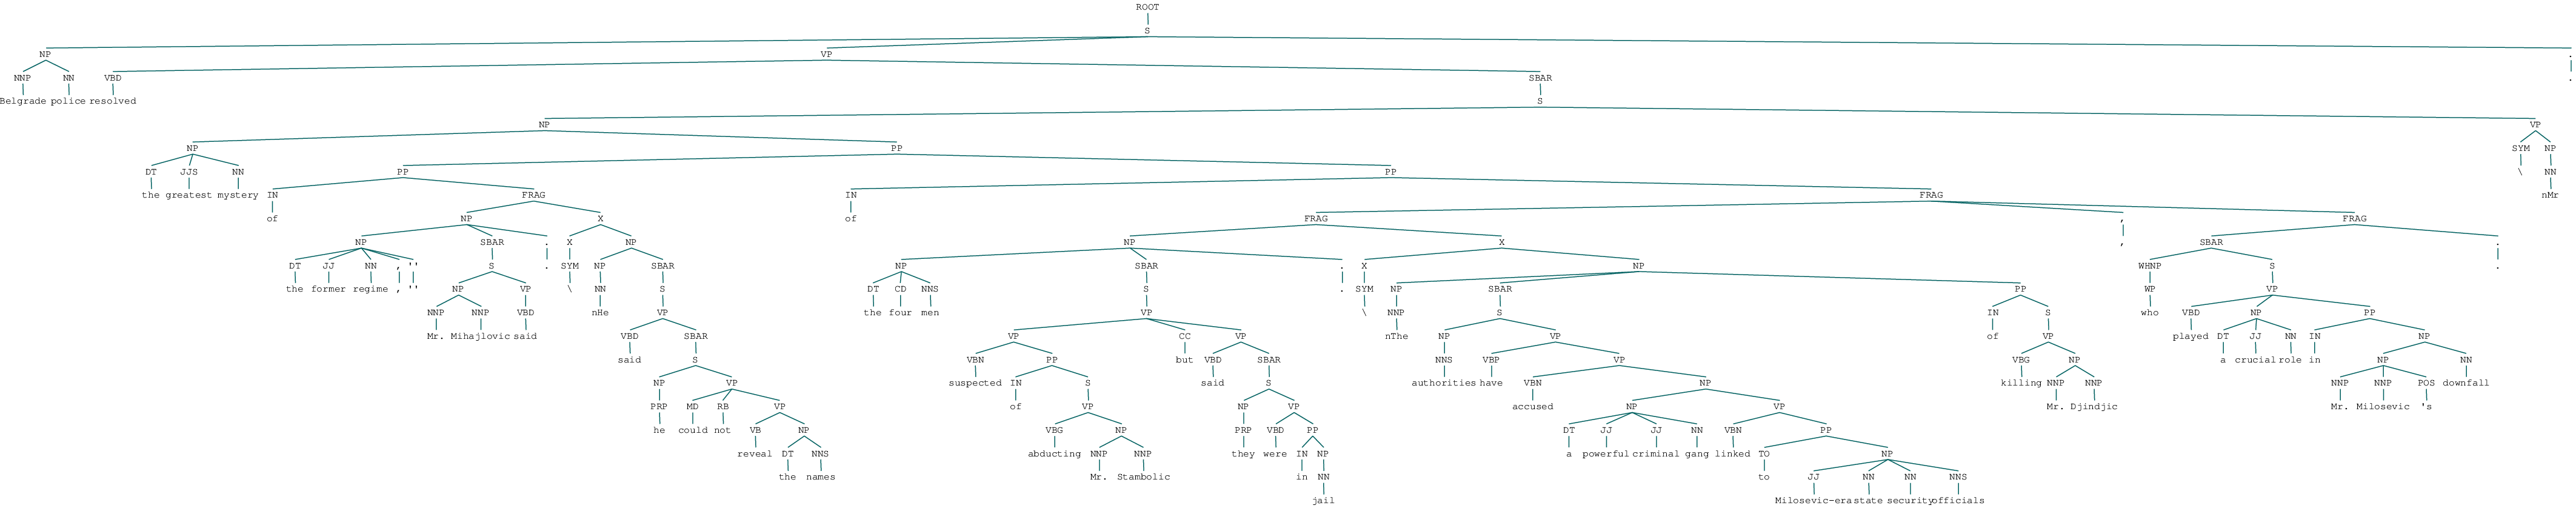

"Text =  Belgrade police resolved the greatest mystery of the former regime,'' Mr. Mihajlovic said.\\nHe said he could not reveal the names of the four men suspected of abducting Mr. Stambolic but said they were in jail.\\nThe authorities have accused a powerful criminal gang linked to Milosevic-era state security officials of killing Mr. Djindjic, who played a crucial role in Mr. Milosevic's downfall.\\nMr."

'Code = 181'

'AID = 23952003'

18

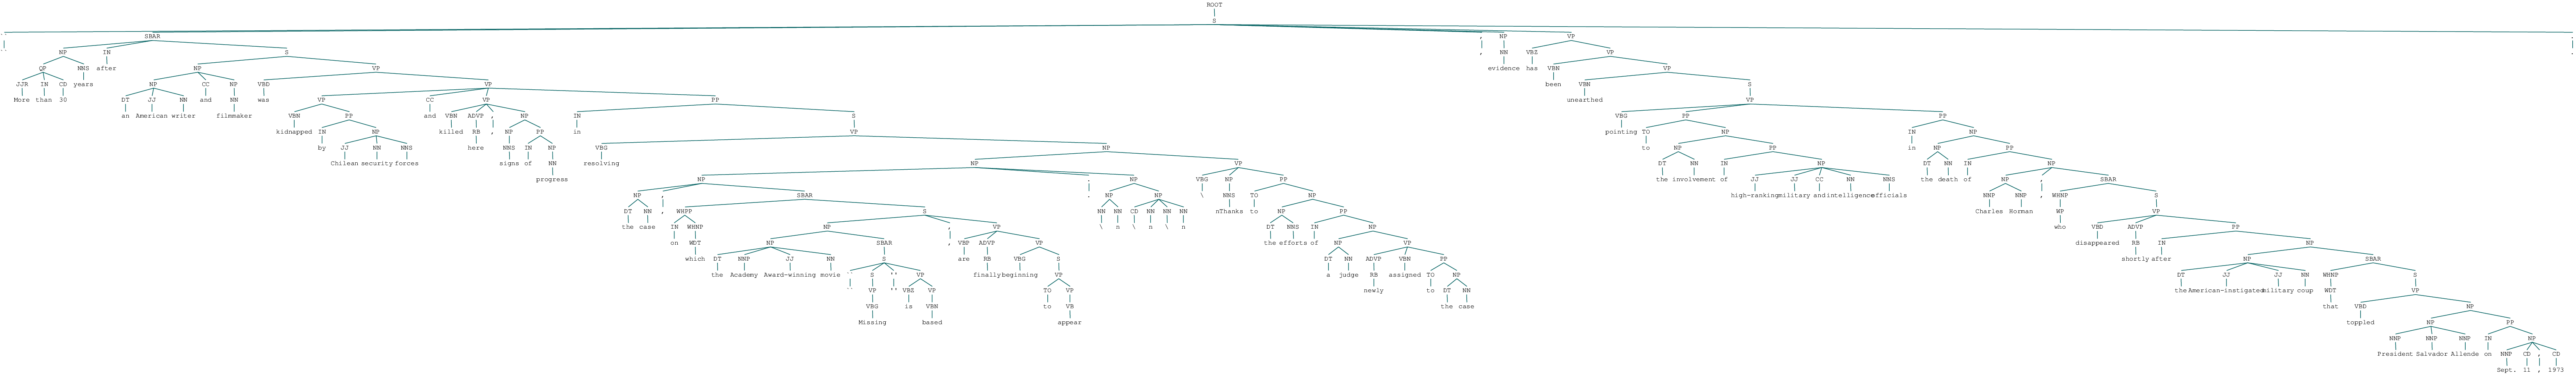

'Text = "More than 30 years after an American writer and filmmaker was kidnapped by Chilean security forces and killed here, signs of progress in resolving the case, on which the Academy Award-winning movie \'\'Missing\'\' is based, are finally beginning to appear.\\n\\n\\n\\nThanks to the efforts of a judge newly assigned to the case, evidence has been unearthed pointing to the involvement of high-ranking military and intelligence officials in the death of Charles Horman, who disappeared shortly after the American-instigated military coup that toppled President Salvador Allende on Sept. 11, 1973.'

'Code = 181'

'AID = 24013073'

19

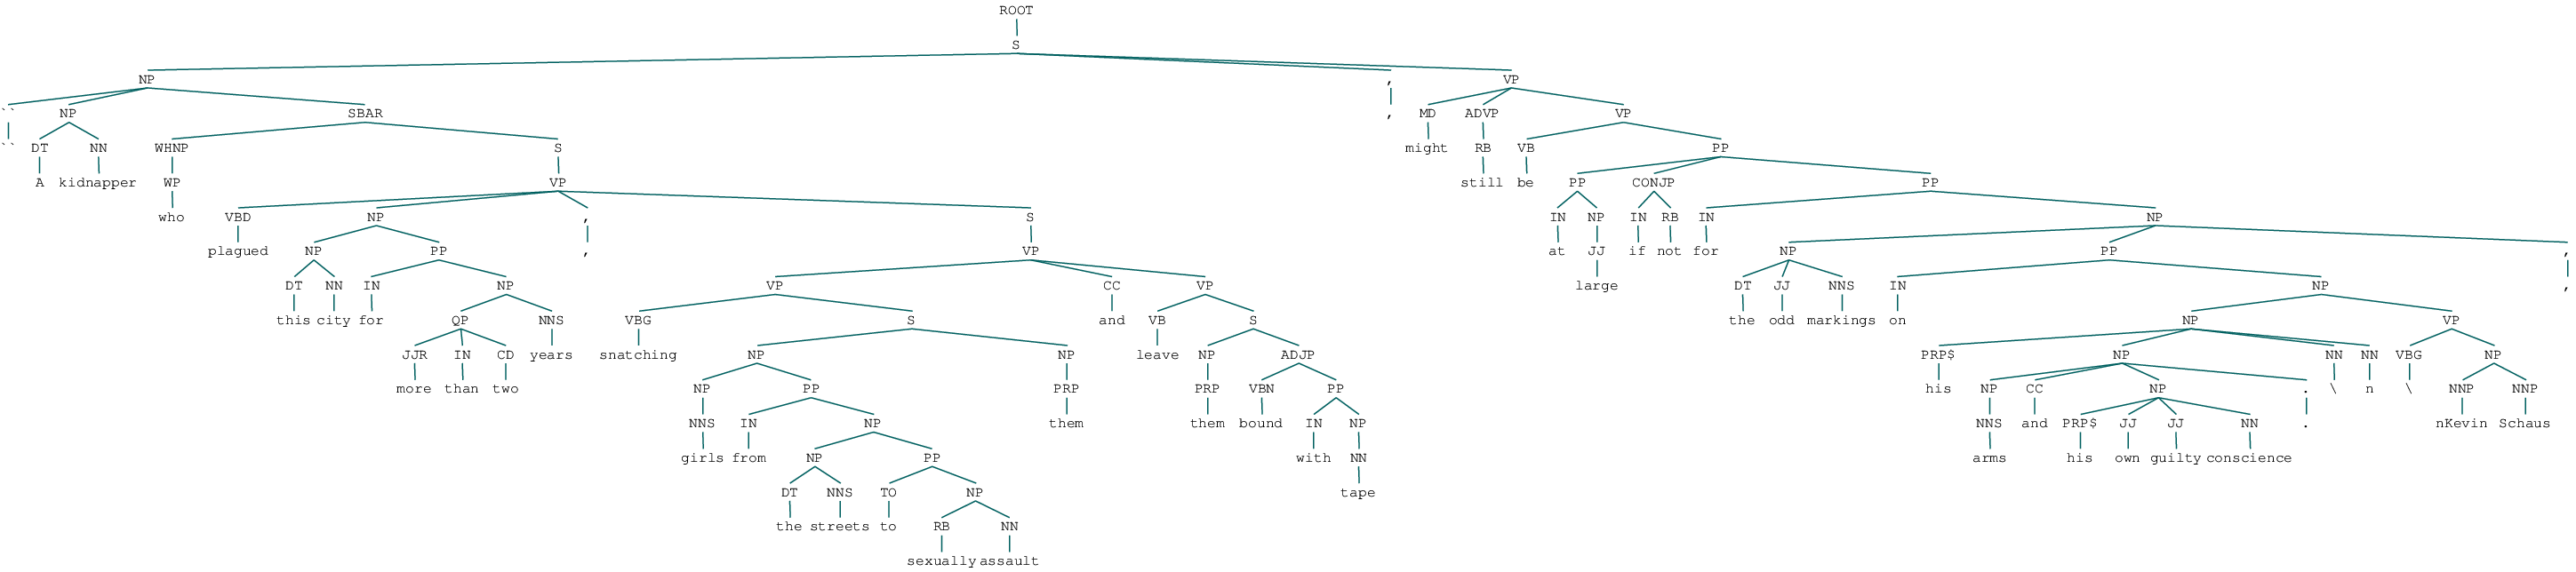

'Text = "A kidnapper who plagued this city for more than two years, snatching girls from the streets to sexually assault them and leave them bound with tape, might still be at large if not for the odd markings on his arms and his own guilty conscience.\\n\\nKevin Schaus,'

'Code = 181'

'AID = 24050043'

20

In [35]:
for i in range(len(accent3_181)):
    parsed_output(accent3_181, i)
    display(i)

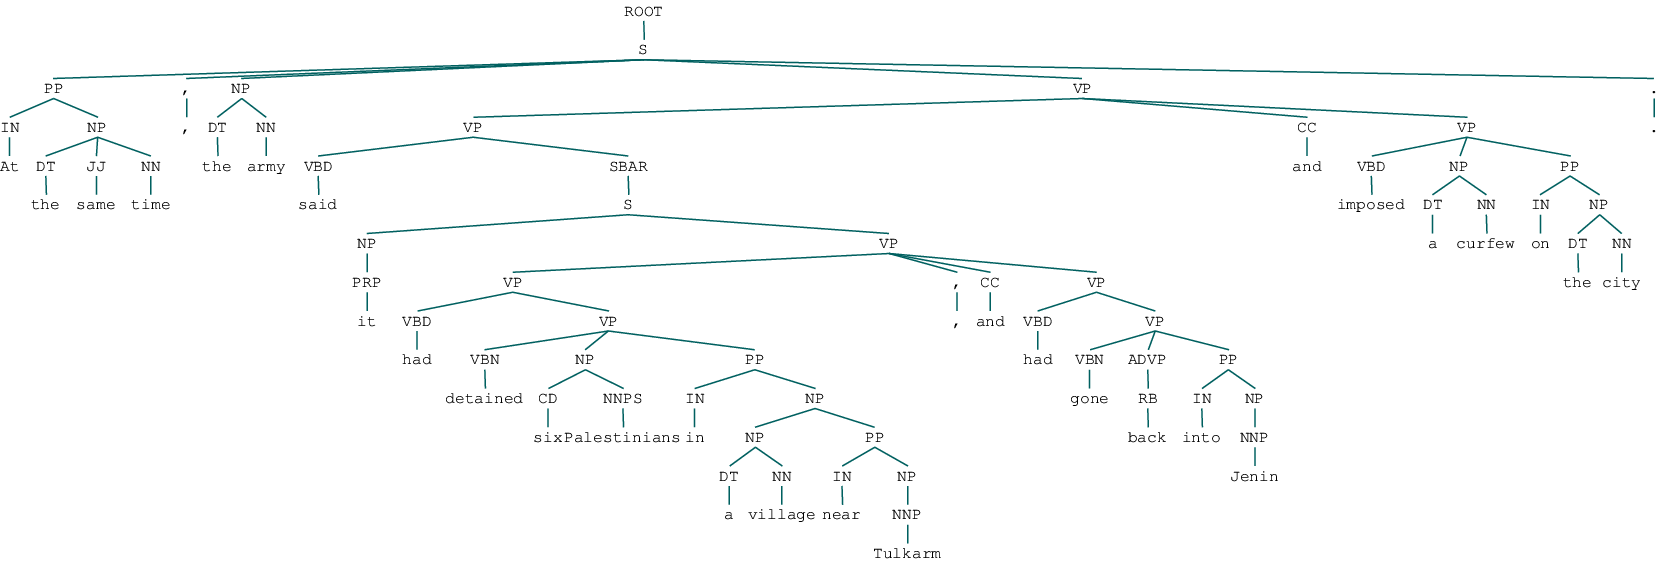

In [34]:
one_sentence_parser("At the same time, the army said it had detained six Palestinians in a village near Tulkarm, and had gone back into Jenin and imposed a curfew on the city.")

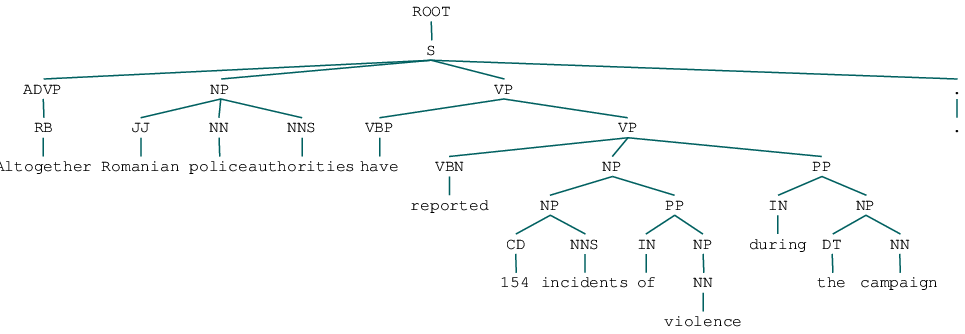

In [15]:
one_sentence_parser("Altogether Romanian police authorities have reported 154 incidents of violence during the campaign.")